# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import time
import gc

pd.options.mode.chained_assignment = None

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [3]:
# Variables (Added an additional code independently.)

# Path
project_file_path ="/content/drive/MyDrive/Colab Notebooks/EDA/NYC Taxi Data/"
export_path = os.path.join(project_file_path, "Export/")  # Ensures correct directory path

# Files
export_filename = "yearly_data.csv"
export_filename_sampled = "yearly_sampled_data.csv"
trial_file_name = '2023-1.parquet'

In [5]:
# Mounting Google Drive (Added an additional code independently.)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df_trail = pd.read_parquet(project_file_path + trial_file_name)
print(project_file_path + trial_file_name, "file loaded successfully.\n")
df_trail.info()

/content/drive/MyDrive/Colab Notebooks/EDA/NYC Taxi Data/2023-1.parquet file loaded successfully.

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount  

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
os.chdir(project_file_path)
total_time_take = 0;
file_count = 0;
valid_extensions = [".parquet"]

# Get the list of all files in the directory
file_list = os.listdir()

# Initialize an empty DataFrame to store the final sampled data
yearly_sampled_data = pd.DataFrame()
yearly_sampled_data_count = len(yearly_sampled_data)

# Iterate through each monthly file
for file_name in file_list:
    try:
      if any(file_name.endswith(ext) for ext in valid_extensions):
        file_count += 1
        start_time = time.time()
        file_path = os.path.join(os.getcwd(), file_name)
        # Read the Parquet file
        df = pd.read_parquet(file_path)
        print(f"{file_count}. Loaded file: '{file_name}'")
        print(f"\tRecord count: {len(df)}")

        # Convert pickup datetime column to datetime type if not already
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        # Extract date and hour for iteration
        df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

        # Get unique dates
        unique_dates = df['pickup_date'].unique()

        # DataFrame to store sampled data from the current file
        sampled_data = pd.DataFrame()

        # Iterate through each date
        for date in unique_dates:
            day_data = df[df['pickup_date'] == date]

            # Iterate through each hour
            for hour in range(24):
                hour_data = day_data[day_data['pickup_hour'] == hour]

                if not hour_data.empty:
                    # Sample 5% of the data for this hour
                    sample = hour_data.sample(frac=0.05, random_state=42)

                    # Append sampled data
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
        end_time = time.time()
        # Calculate duration
        execution_time_seconds = end_time - start_time
        total_time_take += execution_time_seconds
        execution_time_milliseconds = execution_time_seconds * 1000

        # Append sampled monthly data to yearly DataFrame
        yearly_sampled_data = pd.concat([yearly_sampled_data, sampled_data], ignore_index=True)

        # Calculate the number of new rows added in the current iteration
        current_file_reduced_count = len(yearly_sampled_data) - yearly_sampled_data_count

        # Print the reduction count
        print(f"\tReduced to: {current_file_reduced_count}")

        # Print execution time
        print(f"\tReduction time: {execution_time_seconds:.2f} seconds ({execution_time_milliseconds:.0f} ms)")

        # Update the reference count for the next iteration
        yearly_sampled_data_count = len(yearly_sampled_data)

        print(f"\tProcessing completed\n")
      else:
        print(f"Skipping folder: {file_name}")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index of the final sampled dataset
yearly_sampled_data.reset_index(drop=True, inplace=True)

# Total execution time
print(f"Total execution time: {total_time_take:.2f} seconds")
print(f"Yearly Sampled Record: {len(yearly_sampled_data)}")

1. Loaded file: '2023-1.parquet'
	Record count: 3041714
	Reduced to: 152087
	Reduction time: 17.75 seconds (17750 ms)
	Processing completed

2. Loaded file: '2023-2.parquet'
	Record count: 3374086
	Reduced to: 168696
	Reduction time: 24.63 seconds (24628 ms)
	Processing completed

3. Loaded file: '2023-3.parquet'
	Record count: 3275796
	Reduced to: 163786
	Reduction time: 19.40 seconds (19401 ms)
	Processing completed

4. Loaded file: '2023-4.parquet'
	Record count: 2792901
	Reduced to: 139641
	Reduction time: 16.74 seconds (16742 ms)
	Processing completed

5. Loaded file: '2023-5.parquet'
	Record count: 2889185
	Reduced to: 144458
	Reduction time: 18.05 seconds (18049 ms)
	Processing completed

6. Loaded file: '2023-6.parquet'
	Record count: 3258261
	Reduced to: 162910
	Reduction time: 19.87 seconds (19867 ms)
	Processing completed

7. Loaded file: '2023-7.parquet'
	Record count: 3481547
	Reduced to: 174068
	Reduction time: 26.08 seconds (26078 ms)
	Processing completed

8. Loaded fil

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [29]:
# Store the df in csv/parquet

# Save the sampled data
os.makedirs(export_path, exist_ok=True)  # Create directory if not exists

yearly_sampled_data.to_csv(export_path+export_filename)
print(f"Yearly data saved to '{export_path + export_filename}'") # this is 5% of total yearly data.

Yearly data saved to '/content/drive/MyDrive/Colab Notebooks/EDA/NYC Taxi Data/Export/yearly_data.csv'


In [ ]:
# Save the sampled data reduced to 3,00,000 (Added an additional code independently.)
'''
df_sampled = yearly_sampled_data.sample(n=300000, random_state=42)
df_sampled.to_csv(export_path + export_filename_sampled)
print(f"Sampling process completed and saved to '{export_path + export_filename_sampled}'") # this is 300000 of total yearly sampled data.
'''

In [ ]:
# Delete the DataFrame to remove its reference from memory  (Added an additional code independently.)
del yearly_sampled_data
del df_trail

# Force garbage collection to free up unused memory (Added an additional code independently.)
gc.collect()

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [33]:
# Load the new data file

df = pd.read_csv(export_path + export_filename)

In [34]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1           1         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2           2         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3           3         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4           4         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN                NaN   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour  Airport_fee  
0   2023-01-01            0          NaN  
1   2023-01-01            0          NaN  
2   2023-01-01            0          NaN  
3   2023-01-01            0          NaN  
4   2023-01-01            0          NaN  

[5 rows x 23 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [36]:
# Fix the index and drop any columns that are not needed

# removing the un-named column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Setting 'VendorID' as index
df.set_index('VendorID', inplace=True)
print("DataFrame Index:", df.index.name)

DataFrame Index: VendorID


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [37]:
# Combine the two airport fee columns

if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['Airport_fee'] = df[['Airport_fee', 'airport_fee']].sum(axis=1, skipna=True)
    df.drop(columns=['airport_fee'], inplace=True)  # Dropping duplicate column

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [38]:
# check where values of fare amount are negative

negative_fare_df = df[df['fare_amount'] < 0]
print('Total records with negative Fare Amount: ', len(negative_fare_df))

Total records with negative Fare Amount:  0


Did you notice something different in the `RatecodeID` column for above records?

In [39]:
# Analyse RatecodeID for the negative fare amounts

# Count occurrences of each RatecodeID in negative fare records
ratecode_analysis = negative_fare_df["RatecodeID"].value_counts()

# Display the analysis
print("RatecodeID distribution for negative fare amounts:")
print("\n", ratecode_analysis)

RatecodeID distribution for negative fare amounts:

 Series([], Name: count, dtype: int64)


In [41]:
# Find which columns have negative values

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Identify columns with negative values
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

# Display the columns that contain negative values
print("Columns with negative values:")
print("\n".join("\t" + col for col in negative_columns.tolist()))

Columns with negative values:
	extra
	mta_tax
	improvement_surcharge
	total_amount
	congestion_surcharge
	Airport_fee


In [42]:
# fix these negative values

df = df[(df[negative_columns] >= 0).all(axis=1)]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column

null_counts = df.isnull().sum()
print(null_counts)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [44]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

#Replace NaN with the Median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
null_counts = df.isnull().sum()
print(null_counts)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [45]:
# Fix missing values in 'RatecodeID'

missing_ratecode_count = df['RatecodeID'].isnull().sum()
print(f"Missing values in RatecodeID: {missing_ratecode_count}")

#df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

Missing values in RatecodeID: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [46]:
# handle null values in congestion_surcharge

missing_congestion_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in congestion_surcharge: {missing_congestion_count}")

Missing values in congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [48]:
# Handle any remaining missing values

missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print("Columns with missing values and their counts:")
print("\n", missing_columns)

Columns with missing values and their counts:

 Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [51]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Get summary statistics and include missing values
summary_stats = df.describe().T  # Transpose for better readability

# Add missing values count
summary_stats['missing_values'] = df.isnull().sum()

# Reorder columns: count, min, max first
ordered_columns = ['min', 'max'] + [col for col in summary_stats.columns if col not in ['count', 'min', 'max', 'missing_values', 'std']]
summary_stats = summary_stats[ordered_columns]

# Display summary statistics
print(summary_stats)

                       min        max        mean     25%     50%     75%
passenger_count        0.0       9.00    1.369210    1.00    1.00    1.00
trip_distance          0.0   56823.80    3.551470    1.05    1.78    3.37
RatecodeID             1.0      99.00    1.634699    1.00    1.00    1.00
PULocationID           1.0     265.00  165.459623  132.00  162.00  234.00
DOLocationID           1.0     265.00  164.336030  114.00  162.00  234.00
payment_type           1.0       4.00    1.205004    1.00    1.00    1.00
fare_amount            0.0  143163.45   19.826299    9.30   13.50   21.90
extra                  0.0      14.25    1.638281    0.00    1.00    2.50
mta_tax                0.0       4.00    0.495340    0.50    0.50    0.50
tip_amount             0.0     223.08    3.573816    1.00    2.86    4.45
tolls_amount           0.0     143.00    0.595869    0.00    0.00    0.00
improvement_surcharge  0.0       1.00    0.999299    1.00    1.00    1.00
total_amount           0.0  143167.45 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [52]:
# remove passenger_count > 6

print(df['passenger_count'].value_counts())

# Anything more than 6 is customer data entry error. As the count is merely 13 out of 18lakh records, its best to remove them.
df = df[df['passenger_count'] <= 6]
print('\nPost Removal of records')
print(df['passenger_count'].value_counts())


Post Removal of records
passenger_count
1.0    1377168
2.0     277283
3.0      69032
4.0      38532
0.0      29681
5.0      23871
6.0      15859
Name: count, dtype: int64


In [53]:
# Continue with outlier handling  (Added an additional code independently.)

print("Trips with trip_distance > 250 miles:", (df['trip_distance'] > 250).sum())
print("Trips with near-zero distance and fare > 300:", ((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum())
print("Trips with zero fare & distance but different zones:", ((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])).sum())
print("Trips with undefined payment_type (0):", (df['payment_type'] == 0).sum())

Trips with trip_distance > 250 miles: 19
Trips with near-zero distance and fare > 300: 35
Trips with zero fare & distance but different zones: 56
Trips with undefined payment_type (0): 0


In [55]:
# (Added an additional code independently.)

# A fare above $300 with near-zero distance is likely a data entry error.
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# If a trip moves between different zones, both distance and fare should not be zero.
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# Most NYC taxi trips are within city limits, and anything over 250 miles is highly unrealistic.
df = df[df['trip_distance'] <= 250]

# payment_type = 0 is not defined in the dataset and is likely an error.
df = df[df['payment_type'] != 0]

In [56]:
# Expected Output: 0 for all checks, ensuring no invalid records remain. (Added an additional code independently.)

print("Remaining outliers after cleanup:")
print("Trips with trip_distance > 250 miles:", (df['trip_distance'] > 250).sum())
print("Trips with near-zero distance and fare > 300:", ((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum())
print("Trips with zero fare & distance but different zones:", ((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])).sum())
print("Trips with undefined payment_type (0):", (df['payment_type'] == 0).sum())

Remaining outliers after cleanup:
Trips with trip_distance > 250 miles: 0
Trips with near-zero distance and fare > 300: 0
Trips with zero fare & distance but different zones: 0
Trips with undefined payment_type (0): 0


In [57]:
# Checking fare_amount distribution (Added an additional code independently.)

max_fare = df["fare_amount"].max()
bins = list(range(0, int(max_fare) + 101, 100))  # Create bins dynamically

# Assign each fare amount to a bin
df["fare_category"] = pd.cut(df["fare_amount"], bins=bins, right=True, include_lowest=True)

# Count occurrences in each bin
fare_counts = df["fare_category"].value_counts().sort_index()

print(fare_counts)

fare_category
(-0.001, 100.0]         1825443
(100.0, 200.0]             5267
(200.0, 300.0]              478
(300.0, 400.0]               94
(400.0, 500.0]               19
                         ...   
(142700.0, 142800.0]          0
(142800.0, 142900.0]          0
(142900.0, 143000.0]          0
(143000.0, 143100.0]          0
(143100.0, 143200.0]          1
Name: count, Length: 1432, dtype: int64


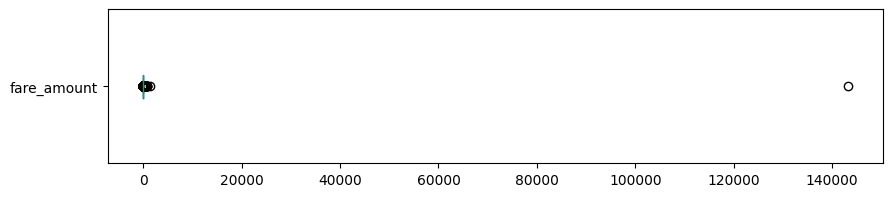

In [58]:
# (Added an additional code independently.)

df["fare_amount"].plot(kind="box", vert=False, figsize=(10, 2))
plt.show()

In [60]:
# (Added an additional code independently.)

print(df["fare_amount"].describe())

count    1.831316e+06
mean     1.981748e+01
std      1.073413e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64


In [63]:
# (Added an additional code independently.)
df = df[df["fare_amount"] <= 400]

bins = list(range(0, 401, 100))  # Limit bins to 400
df["fare_category"] = pd.cut(df["fare_amount"], bins=bins, right=True, include_lowest=True)
fare_counts_cleaned = df["fare_category"].value_counts().sort_index()
print(fare_counts_cleaned)

# Removing 'fare_category'
df.drop(columns=['fare_category'], inplace=True)

fare_category
(-0.001, 100.0]    1825443
(100.0, 200.0]        5267
(200.0, 300.0]         478
(300.0, 400.0]          94
Name: count, dtype: int64


In [64]:
# checking payment types # (Added an additional code independently.)
unique_payment_types = df["payment_type"].unique()
print(unique_payment_types)

[2 1 4 3]


In [65]:
# Do any columns need standardising?

num_summary = df.describe().T[['min', 'max']]
print(num_summary)

                       min     max
passenger_count        0.0    6.00
trip_distance          0.0  187.35
RatecodeID             1.0   99.00
PULocationID           1.0  265.00
DOLocationID           1.0  265.00
payment_type           1.0    4.00
fare_amount            0.0  400.00
extra                  0.0   14.25
mta_tax                0.0    4.00
tip_amount             0.0  223.08
tolls_amount           0.0  143.00
improvement_surcharge  0.0    1.00
total_amount           0.0  489.47
congestion_surcharge   0.0    2.50
pickup_hour            0.0   23.00
Airport_fee            0.0    1.75


In [66]:
# (Added an additional code independently.)
# Filter rows where fare_amount is 0, total_amount = 0
zero_fare_df = df[(df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) & (df['total_amount'] == 0 )]

# Display selected columns
print(zero_fare_df[['trip_distance', 'fare_amount', 'payment_type', 'tolls_amount', 'total_amount']].head())

print("Record Count:", len(zero_fare_df))

          trip_distance  fare_amount  payment_type  tolls_amount  total_amount
VendorID                                                                      
1                  20.8          0.0             4           0.0           0.0
1                   2.8          0.0             4           0.0           0.0
1                   3.5          0.0             4           0.0           0.0
1                   0.1          0.0             3           0.0           0.0
1                   0.3          0.0             4           0.0           0.0
Record Count: 51


In [67]:
# (Added an additional code independently.)
df = df[~((df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) & (df['total_amount'] == 0))]

# Filter rows where fare_amount is 0
zero_fare_df = df[(df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']) & (df['total_amount'] == 0 )]
print("Record Count:", len(zero_fare_df))

Record Count: 0


In [71]:
# (Added an additional code independently.)
# Filter rows where fare_amount is 0, total_amount = 0 & trip_distance!=0
zero_fare_df = df[(df['fare_amount'] == 0) & (df['total_amount'] == 0 ) & (df['trip_distance'] != 0 ) ]

# Display selected columns
print(zero_fare_df[['trip_distance', 'fare_amount', 'payment_type', 'tolls_amount', 'total_amount']].head())

print("Record Count:", len(zero_fare_df))

del zero_fare_df
gc.collect()

Empty DataFrame
Columns: [trip_distance, fare_amount, payment_type, tolls_amount, total_amount]
Index: []
Record Count: 0


12453

In [72]:
# (Added an additional code independently.)
# Filter rows where fare_amount, total_amount is 0 & distance is not zero is not zero
df = df[~((df['fare_amount'] == 0) & (df['total_amount'] == 0 ) & (df['trip_distance'] != 0 ))]

print("Record Count:", len(df))

Record Count: 1831207


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [73]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
'''

•	Numerical Variables:
    o	passenger_count
    o	trip_distance
    o	pickup_hour
    o	trip_duration
    o	fare_amount
    o	extra
    o	mta_tax
    o	tip_amount
    o	tolls_amount
    o	improvement_surcharge
    o	total_amount
    o	congestion_surcharge
    o	airport_fee
•	All the monetary parameters belong to the numerical category.

•	Categorical Variables:
    o	VendorID
    o	RatecodeID
    o	PULocationID (Pickup Location ID)
    o	DOLocationID (Dropoff Location ID)
    o	payment_type

•	Datetime Variables (A separate category representing timestamps):
    o	tpep_pickup_datetime
    o	tpep_dropoff_datetime


'''

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

pickup_hour
0      51158
1      34276
2      22550
3      14708
4       9436
5      10018
6      24466
7      48987
8      68268
9      78277
10     85623
11     93031
12    100996
13    104095
14    111554
15    114280
16    114269
17    123551
18    129180
19    115910
20    103434
21    103160
22     95158
23     74822
dtype: int64


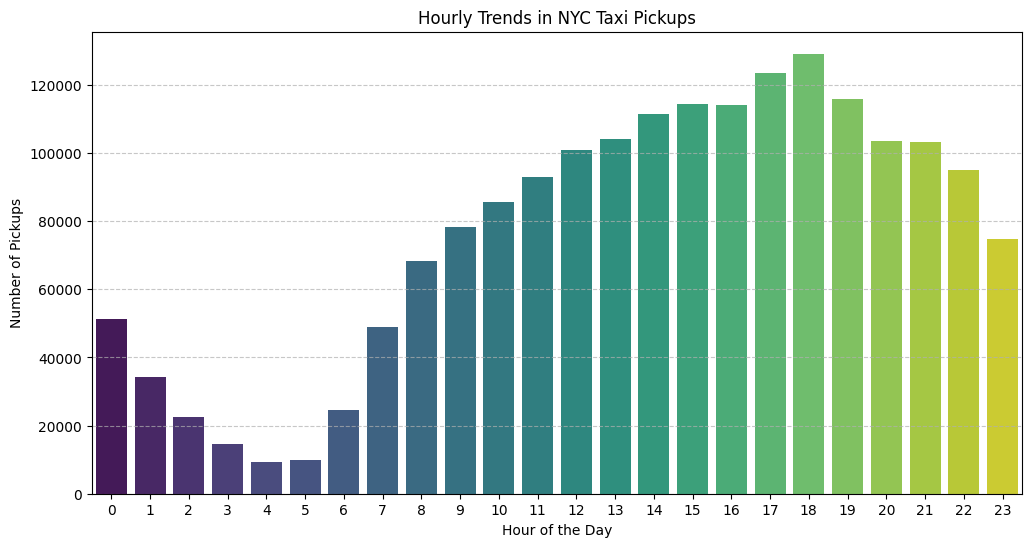

In [75]:
# Find and show the hourly trends in taxi pickups

# Group by pickup_hour and count the number of trips
hourly_trends = df.groupby('pickup_hour').size()

# Display sorted hourly trends
print(hourly_trends)

# Plot the hourly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette="viridis")

# Formatting the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in NYC Taxi Pickups")
plt.xticks(range(24))  # Ensure all hours (0-23) are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

del hourly_trends

pickup_day
Monday       228938
Tuesday      265897
Wednesday    281537
Thursday     287231
Friday       271592
Saturday     265841
Sunday       230171
dtype: int64


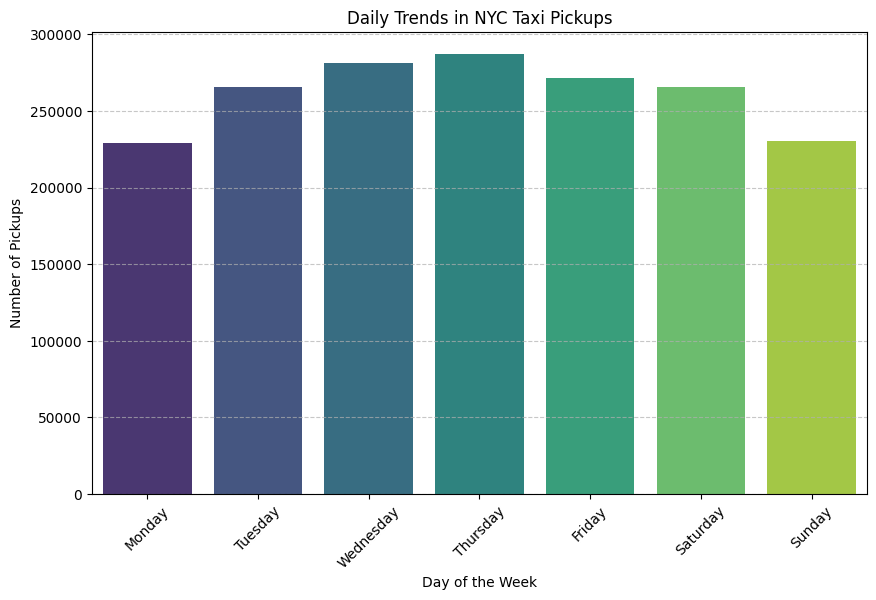

In [76]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Group by day of the week and count pickups
df_daily_trends = df.groupby('pickup_day').size()

# Rename index for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_daily_trends.index = df_daily_trends.index.map(days_mapping)

# Display daily trends
print(df_daily_trends)

# Plot daily trends
plt.figure(figsize=(10, 6))
sns.barplot(x=df_daily_trends.index, y=df_daily_trends.values, palette="viridis")

# Formatting the plot
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in NYC Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

del df_daily_trends

pickup_month
January      148458
February     140694
March        164268
April        158366
May          168960
June         158972
July         139708
August       135241
September    133916
October      166505
November     158381
December     157738
dtype: int64


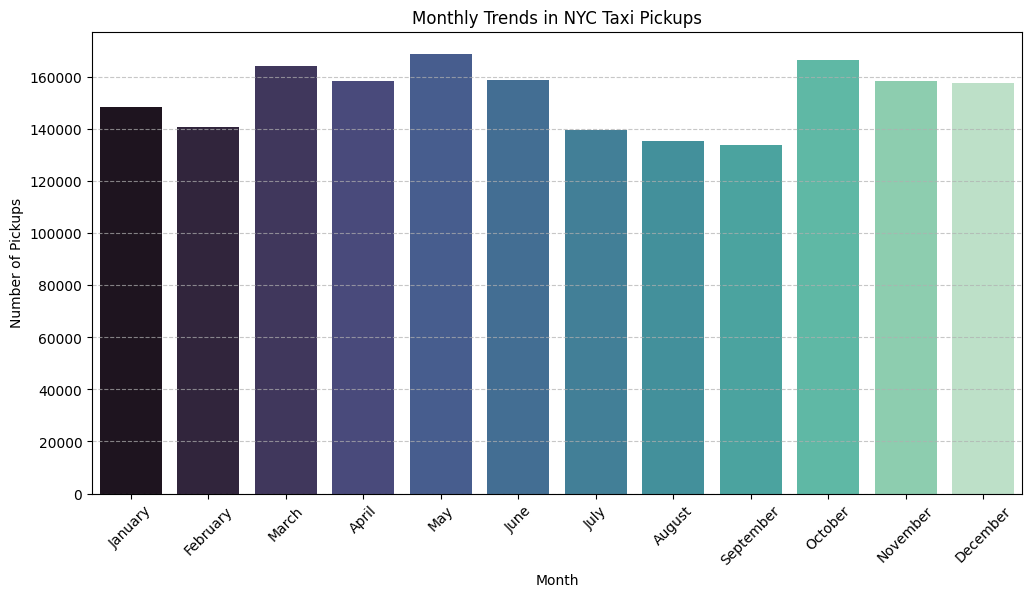

In [78]:
# Show the monthly trends in pickups

# Extract the month
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and count pickups
df_monthly_trends = df.groupby('pickup_month').size()

# Rename index for better readability
months_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                  5: 'May', 6: 'June', 7: 'July', 8: 'August',
                  9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_monthly_trends.index = df_monthly_trends.index.map(months_mapping)

# Display monthly trends
print(df_monthly_trends)

# Plot monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=df_monthly_trends.index, y=df_monthly_trends.values, palette="mako")

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in NYC Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

del df_monthly_trends

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [79]:
# Analyse the above parameters

# List of financial columns to analyze
lst_financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values
for col in lst_financial_columns:
    zero_values = (df[col] == 0).sum()
    negative_values = (df[col] < 0).sum()

    print(f"{col}:")
    print(f"\tZero values: {zero_values}")
    print(f"\tNegative values: {negative_values}\n")

fare_amount:
	Zero values: 426
	Negative values: 0

tip_amount:
	Zero values: 410059
	Negative values: 0

total_amount:
	Zero values: 180
	Negative values: 0

trip_distance:
	Zero values: 22911
	Negative values: 0



       fare_amount  tip_amount  total_amount  trip_distance
count   1831207.00  1831207.00    1831207.00     1831207.00
mean         19.73        3.57         28.85           3.44
std          18.11        4.07         22.75           4.52
min           0.00        0.00          0.00           0.00
25%           9.30        1.00         15.96           1.05
50%          13.50        2.86         21.00           1.78
75%          21.90        4.45         30.70           3.37
max         400.00      223.08        489.47         187.35


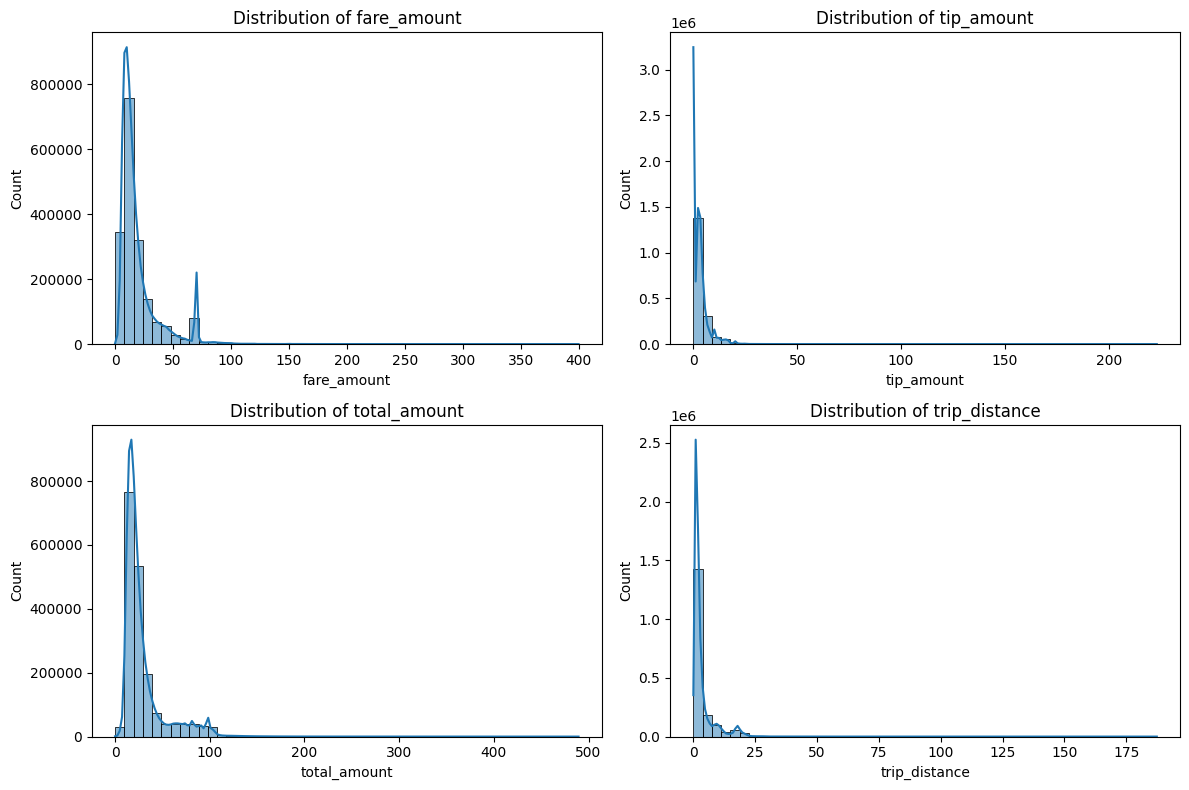

In [81]:
# (Added an additional code independently.)

print(df[lst_financial_columns].describe().round(2))

# Set up figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each financial parameter
for i, col in enumerate(lst_financial_columns):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [82]:
# Create a df with non zero entries for the selected parameters.

# Yes, creating a filtered copy of the DataFrame without zero values in fare_amount, tip_amount, total_amount, and trip_distance is useful

# List of financial columns to filter
financial_columns = ['fare_amount', 'tip_amount', 'total_amount']

# Create a new DataFrame excluding zero values in financial columns
df_backup = df.copy()
df = df[(df[financial_columns] > 0).all(axis=1)].copy()

print(f"Original DataFrame size: {df_backup.shape[0]} rows")
print(f"Filtered DataFrame size: {df.shape[0]} rows")

Original DataFrame size: 1831207 rows
Filtered DataFrame size: 1421130 rows


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

   pickup_month  monthly_revenue
0       January       3245796.96
1      February       3084045.39
2         March       3717654.58
3         April       3605692.08
4           May       3961520.36
5          June       3712897.55
6          July       3149195.16
7        August       3049495.79
8     September       3222391.94
9       October       4012074.88
10     November       3764462.19
11     December       3669670.15


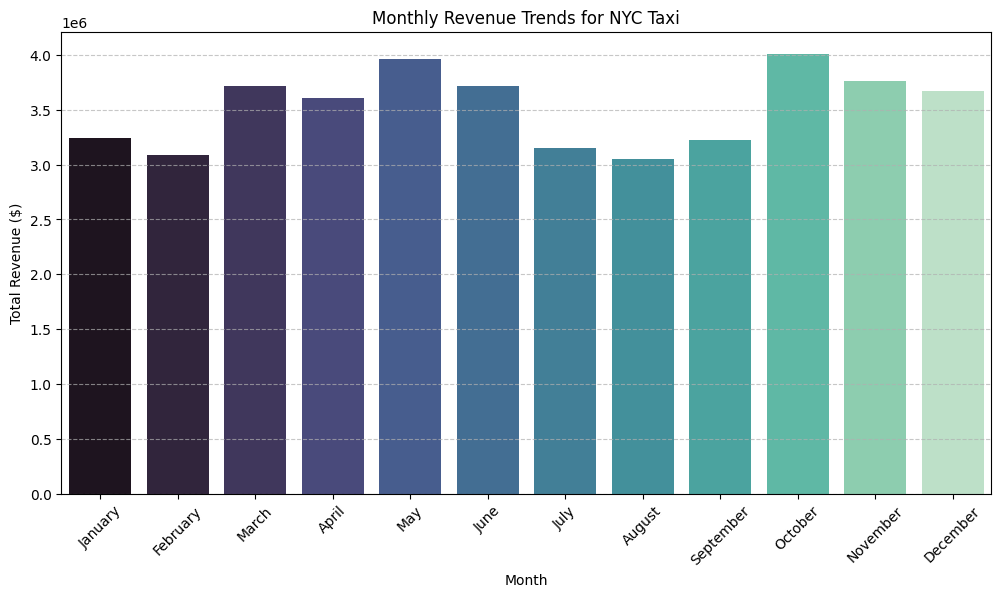

In [83]:
# Group data by month and analyse monthly revenue

# Group by month and sum total revenue (total_amount includes fare + tips + surcharges)
df_monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Rename column for clarity
df_monthly_revenue.rename(columns={'total_amount': 'monthly_revenue'}, inplace=True)

# Map month numbers to names for better readability
months_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                  5: 'May', 6: 'June', 7: 'July', 8: 'August',
                  9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_monthly_revenue['pickup_month'] = df_monthly_revenue['pickup_month'].map(months_mapping)

# Display results
print(df_monthly_revenue)

# Plot revenue trends
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_month', y='monthly_revenue', data=df_monthly_revenue, palette="mako")

# Formatting
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trends for NYC Taxi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

del df_monthly_revenue

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    24.875557
2    26.550210
3    21.897645
4    26.676588
Name: count, dtype: float64


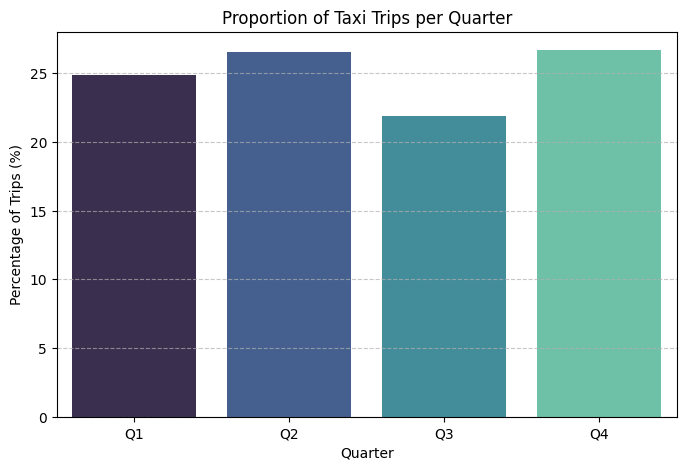

In [84]:
# Calculate proportion of each quarter

# Extract the quarter (1 = Jan-Mar, 2 = Apr-Jun, etc.)
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Count trips for each quarter
quarterly_counts = df['quarter'].value_counts().sort_index()

# Calculate proportion of trips per quarter
quarterly_proportion = (quarterly_counts / quarterly_counts.sum()) * 100

# Display results
print(quarterly_proportion)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_proportion.index, y=quarterly_proportion.values, palette="mako")

# Formatting
plt.xlabel("Quarter")
plt.ylabel("Percentage of Trips (%)")
plt.title("Proportion of Taxi Trips per Quarter")
plt.xticks([0, 1, 2, 3], ["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

del quarterly_proportion

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

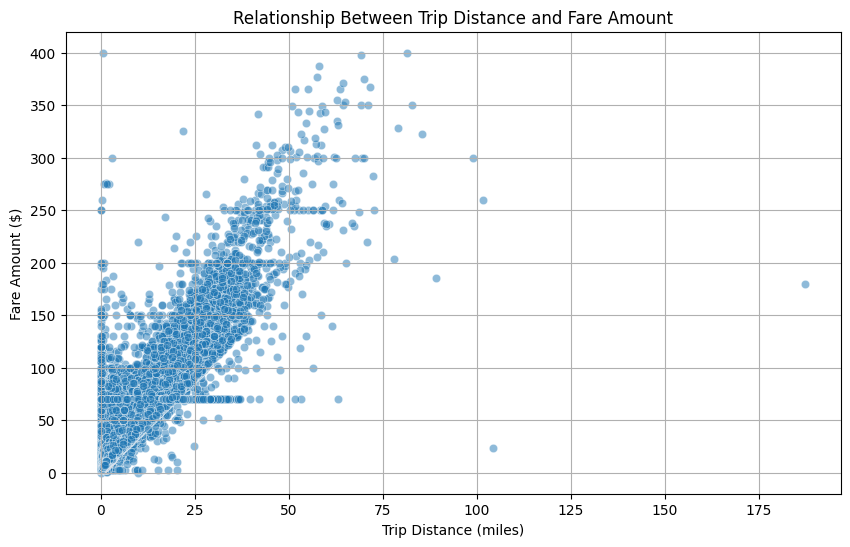

In [87]:
# Show how trip fare is affected by distance

# Remove zero-distance trips
df_filtered = df[df['trip_distance'] > 0]

# Scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['fare_amount'], alpha=0.5)

# Formatting
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid(True)

# Show the plot
plt.show()

In [88]:
# Calculate correlation
correlation_value = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])

print(f"Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}")

del df_filtered

Correlation between Trip Distance and Fare Amount: 0.95


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [90]:
# Ensure datetime format (Added an additional code independently.)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

Correlation between Fare Amount and Trip Duration: 0.32
Correlation between Fare Amount and Passenger Count: 0.04
Correlation between Tip Amount and Trip Distance: 0.78


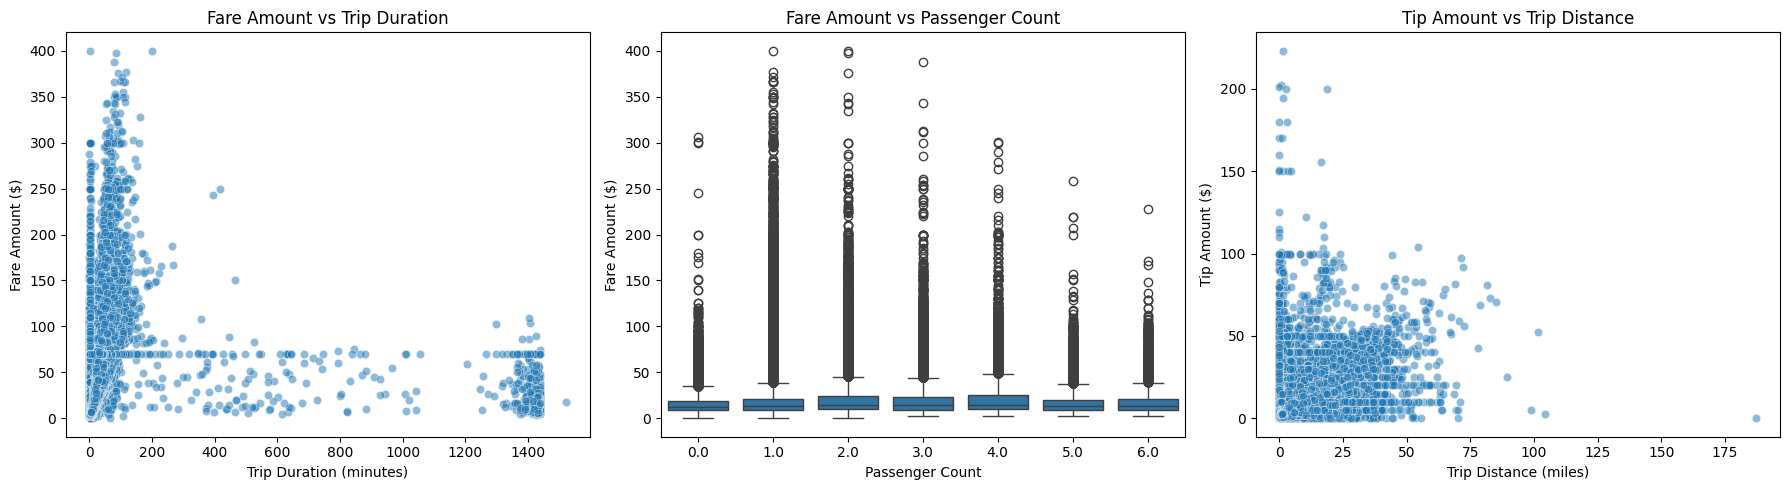

In [91]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove trips with zero or negative duration (data issues)
df = df[df['trip_duration'] > 0]

# Compute correlations
corr_fare_duration = df['fare_amount'].corr(df['trip_duration'])
corr_fare_passenger = df['fare_amount'].corr(df['passenger_count'])
corr_tip_distance = df['tip_amount'].corr(df['trip_distance'])

# Print results
print(f"Correlation between Fare Amount and Trip Duration: {corr_fare_duration:.2f}")
print(f"Correlation between Fare Amount and Passenger Count: {corr_fare_passenger:.2f}")
print(f"Correlation between Tip Amount and Trip Distance: {corr_tip_distance:.2f}")

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Fare Amount vs Trip Duration
sns.scatterplot(x=df['trip_duration'], y=df['fare_amount'], alpha=0.5, ax=axes[0])
axes[0].set_title("Fare Amount vs Trip Duration")
axes[0].set_xlabel("Trip Duration (minutes)")
axes[0].set_ylabel("Fare Amount ($)")

# Scatter plot: Fare Amount vs Passenger Count
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], ax=axes[1])
axes[1].set_title("Fare Amount vs Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Fare Amount ($)")

# Scatter plot: Tip Amount vs Trip Distance
sns.scatterplot(x=df['trip_distance'], y=df['tip_amount'], alpha=0.5, ax=axes[2])
axes[2].set_title("Tip Amount vs Trip Distance")
axes[2].set_xlabel("Trip Distance (miles)")
axes[2].set_ylabel("Tip Amount ($)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Correlation between Fare Amount and Passenger Count: 0.04



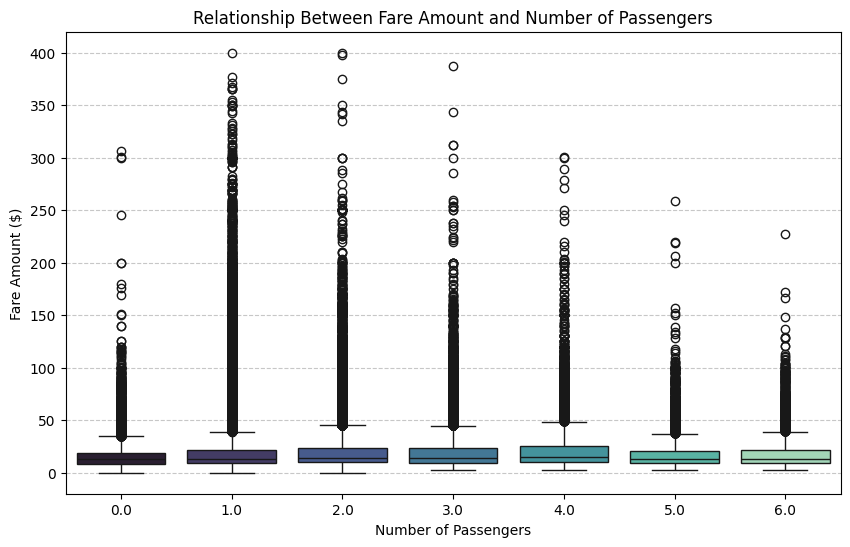

In [93]:
# Show relationship between fare and number of passengers

# Calculate correlation
corr_fare_passenger = df['fare_amount'].corr(df['passenger_count'])

print(f"Correlation between Fare Amount and Passenger Count: {corr_fare_passenger:.2f}\n")

# Boxplot to show fare distribution across passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette="mako")

# Formatting
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Fare Amount and Number of Passengers")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Correlation between Tip Amount and Trip Distance: 0.78



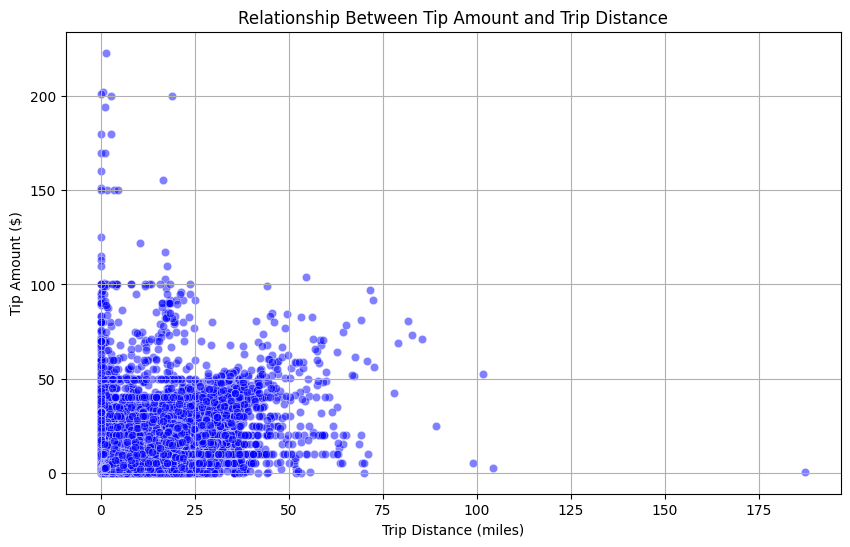

In [94]:
# Show relationship between tip and trip distance

# Calculate correlation
corr_tip_distance = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between Tip Amount and Trip Distance: {corr_tip_distance:.2f}\n")

# Scatter plot: Tip Amount vs Trip Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['tip_amount'], alpha=0.5, color="blue")

# Formatting
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.grid(True)

# Show the plot
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [112]:
# Analyse the distribution of different payment types (payment_type).

# Count occurrences of each payment type
payment_counts = df['payment_type'].value_counts()

# Map numeric codes to meaningful labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
payment_counts.index = payment_counts.index.map(payment_labels)

# Display the distribution
print(payment_counts)

payment_type
Credit Card    1420918
No Charge           71
Dispute             29
Cash                23
Name: count, dtype: int64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [113]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones_file_name = 'Taxi Zones/taxi_zones.shp'
zones = gpd.read_file(project_file_path + zones_file_name)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

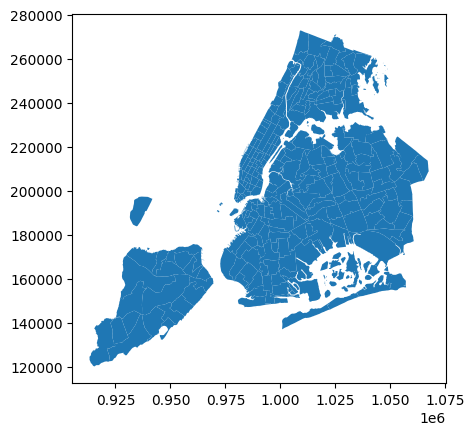

In [114]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [138]:
# Merge zones and trip records using locationID and PULocationID

# Merge trip data with taxi zones using PULocationID
df_pickup_zones = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Display merged dataset with relevant columns
print(df_pickup_zones[['PULocationID', 'zone', 'fare_amount', 'trip_distance']].head())

del df_pickup_zones

   PULocationID                       zone  fare_amount  trip_distance
0           161             Midtown Center          7.9           1.24
1           246  West Chelsea/Hudson Yards         34.5           7.10
2            79               East Village         11.4           1.59
3            79               East Village         19.1           3.16
4           132                JFK Airport         31.7           7.64


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

     PULocationID  total_pickups
209           237          70047
141           161          68002
115           132          64163
208           236          63887
142           162          52875
     PULocationID                   zone    borough  total_pickups
210           237  Upper East Side South  Manhattan          70047
142           161         Midtown Center  Manhattan          68002
116           132            JFK Airport     Queens          64163
209           236  Upper East Side North  Manhattan          63887
143           162           Midtown East  Manhattan          52875


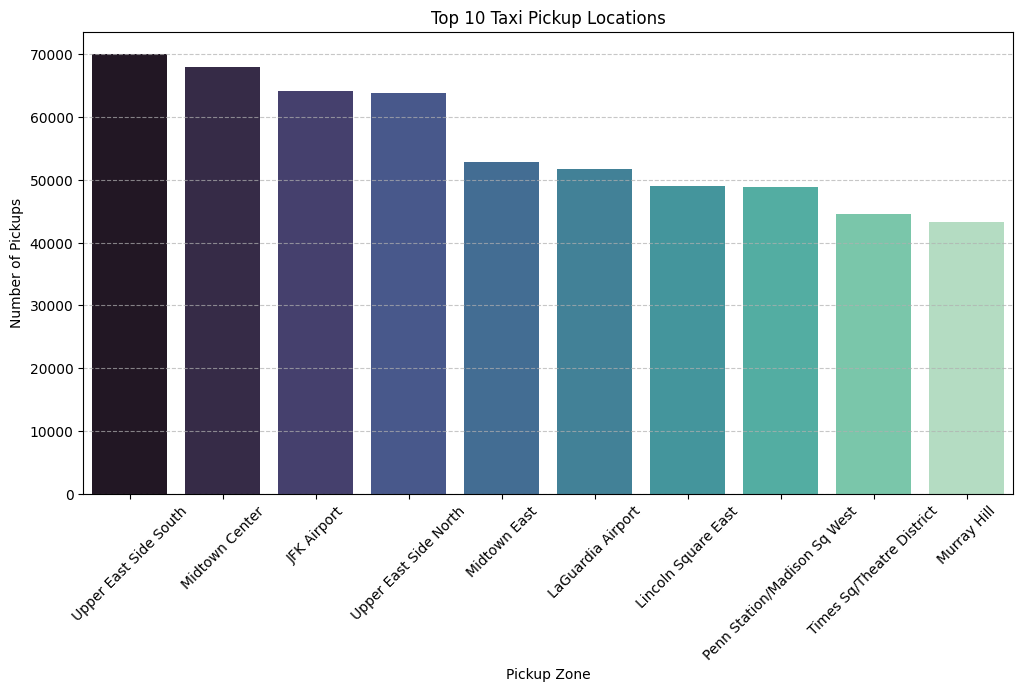

In [139]:
# Group data by location and calculate the number of trips

# Count the number of trips per pickup location
pickup_counts = df.groupby('PULocationID').size().reset_index(name='total_pickups')

# Display top locations with the most pickups
print(pickup_counts.sort_values(by='total_pickups', ascending=False).head())

# Merge pickup counts with taxi zones
pickup_counts = pickup_counts.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Select relevant columns
pickup_counts = pickup_counts[['PULocationID', 'zone', 'borough', 'total_pickups']]

# Display top pickup locations
print(pickup_counts.sort_values(by='total_pickups', ascending=False).head())

# Select top 10 pickup locations
top_pickups = pickup_counts.sort_values(by="total_pickups", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickups['zone'], y=top_pickups['total_pickups'], palette="mako")

# Formatting
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Pickups")
plt.title("Top 10 Taxi Pickup Locations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [140]:
# Merge trip counts back to the zones GeoDataFrame

# Merge trip counts with taxi zones
df_taxi_zones_trips = zones.merge(pickup_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (locations with no pickups) with 0
df_taxi_zones_trips['total_pickups'].fillna(0, inplace=True)

# Display the updated GeoDataFrame
print(df_taxi_zones_trips.head())

   OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

       borough_x                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID          zone_y  borough_y  total_pickups  
0           1.0  Newark Airport        EWR          127.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

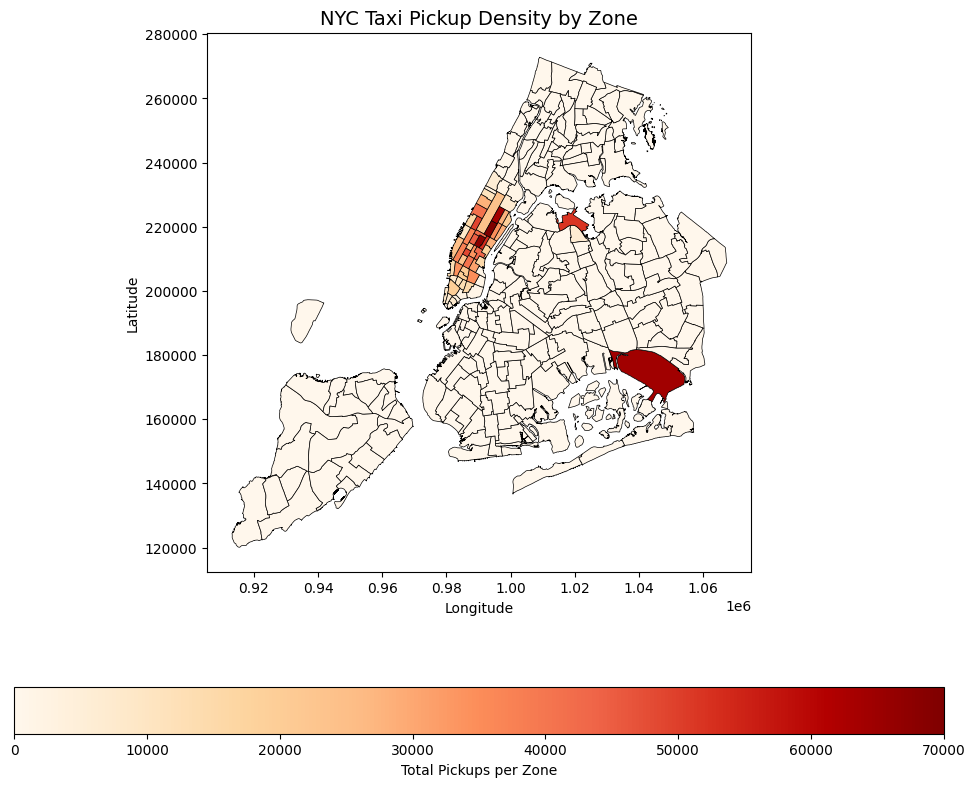

In [141]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
df_taxi_zones_trips.plot(
    column='total_pickups',  # Column representing the number of trips
    cmap='OrRd',  # Color scheme (Red-Orange)
    linewidth=0.5,  # Border width for zones
    edgecolor='black',  # Border color
    ax=ax,  # Plot on the defined axis
    legend=True,  # Show legend
    legend_kwds={'label': "Total Pickups per Zone", 'orientation': "horizontal"}  # Legend settings
)

# Formatting
ax.set_title("NYC Taxi Pickup Density by Zone", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [142]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by the number of trips (total_pickups)
sorted_zones = df_taxi_zones_trips.sort_values(by='total_pickups', ascending=False)

# Display relevant columns
print(sorted_zones[['LocationID', 'zone_x', 'borough_x', 'total_pickups']].head(10))

del df_taxi_zones_trips

     LocationID                        zone_x  borough_x  total_pickups
238         237         Upper East Side South  Manhattan        70047.0
162         161                Midtown Center  Manhattan        68002.0
133         132                   JFK Airport     Queens        64163.0
237         236         Upper East Side North  Manhattan        63887.0
163         162                  Midtown East  Manhattan        52875.0
139         138             LaGuardia Airport     Queens        51798.0
143         142           Lincoln Square East  Manhattan        49092.0
187         186  Penn Station/Madison Sq West  Manhattan        48790.0
231         230     Times Sq/Theatre District  Manhattan        44627.0
171         170                   Murray Hill  Manhattan        43352.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [151]:
# Find routes which have the slowest speeds at different times of the day

df['speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60)
slowest_routes = df.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_speed_mph=("speed_mph", "mean"),  # Average speed in mph
    avg_trip_time=("trip_duration", "mean"),  # Average trip duration
    trip_count=("trip_duration", "count")  # Count of trips
).reset_index()  # Reset index for better readability


slowest_routes = slowest_routes[slowest_routes['avg_speed_mph']>0] # zero mph is invalid record
slowest_routes = slowest_routes[slowest_routes['avg_trip_time']>1] # as its in min
slowest_routes = slowest_routes[slowest_routes['trip_count']>12] # filtering the outliers
slowest_routes = slowest_routes[slowest_routes['PULocationID'] != slowest_routes['DOLocationID']] # filtering same location records

slowest_routes.sort_values(by='avg_speed_mph',ascending=True).head(10)

PULocationID  DOLocationID  pickup_hour  avg_speed_mph  avg_trip_time  \
84306           233           230           12       3.453919      20.843333   
70329           186           100           12       3.472985      12.537908   
70333           186           100           16       3.561723      11.737121   
25398           100            48           13       3.776618      14.362255   
70330           186           100           13       3.777196      11.552632   
70957           186           164           12       3.806442      13.675000   
70328           186           100           11       3.819958      13.851634   
70331           186           100           14       3.901034      10.889744   
70327           186           100           10       3.911899      11.271545   
61728           162           230           13       3.937363      15.977825   

       trip_count  
84306          30  
70329          51  
70333          44  
25398          34  
70330          57  
70957          58  
70328          51  
70331          39  
70327          41  
61728         118

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

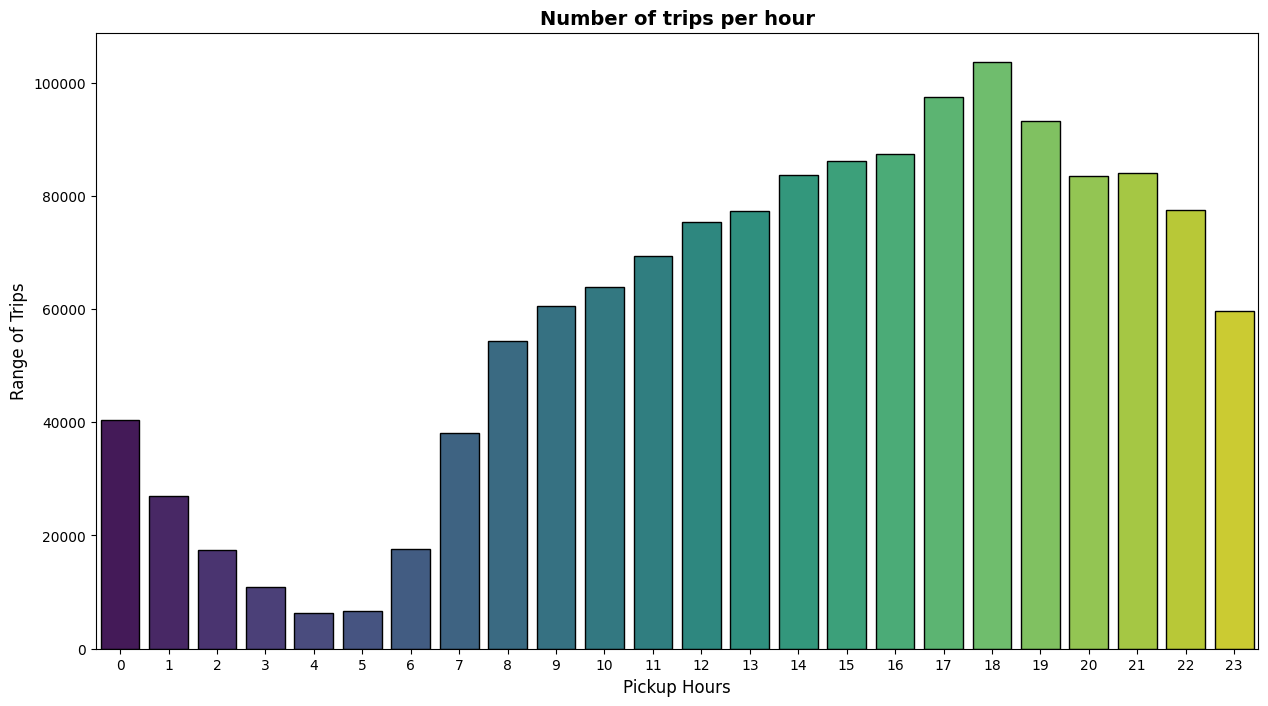

In [152]:
# Visualise the number of trips per hour and find the busiest hour

busiest_hours=df.pickup_hour.value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x=busiest_hours.index, y=busiest_hours.values, palette='viridis', edgecolor='black')
plt.xlabel('Pickup Hours',fontsize=12)
plt.ylabel('Range of Trips',fontsize=12)
plt.title('Number of trips per hour',fontsize=14,fontweight='bold')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [153]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 1/0.05
scaled_up_count=busiest_hours*sample_fraction
scaled_up_count.sort_values(ascending=False).astype(int).head(24)

pickup_hour
18    2072280
17    1949820
19    1863380
16    1747620
15    1723760
21    1681540
14    1673060
20    1670880
22    1551080
13    1547020
12    1507240
11    1386120
10    1278960
9     1208920
23    1193020
8     1085520
0      806780
7      761660
1      537700
6      353060
2      348020
3      216840
5      131540
4      125000
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

day_type     Weekday  Weekend
pickup_hour                  
0              19539    20800
1               9509    17376
2               4981    12420
3               2852     7990
4               2420     3830
5               5081     1496
6              15051     2602
7              33797     4286
8              47230     7046
9              48890    11556
10             48328    15620
11             50668    18638
12             54184    21178
13             55341    22010
14             61200    22453
15             63437    22751
16             64055    23326
17             73567    23924
18             79766    23848
19             70780    22389
20             64018    19526
21             64717    19360
22             58498    19056
23             42656    16995


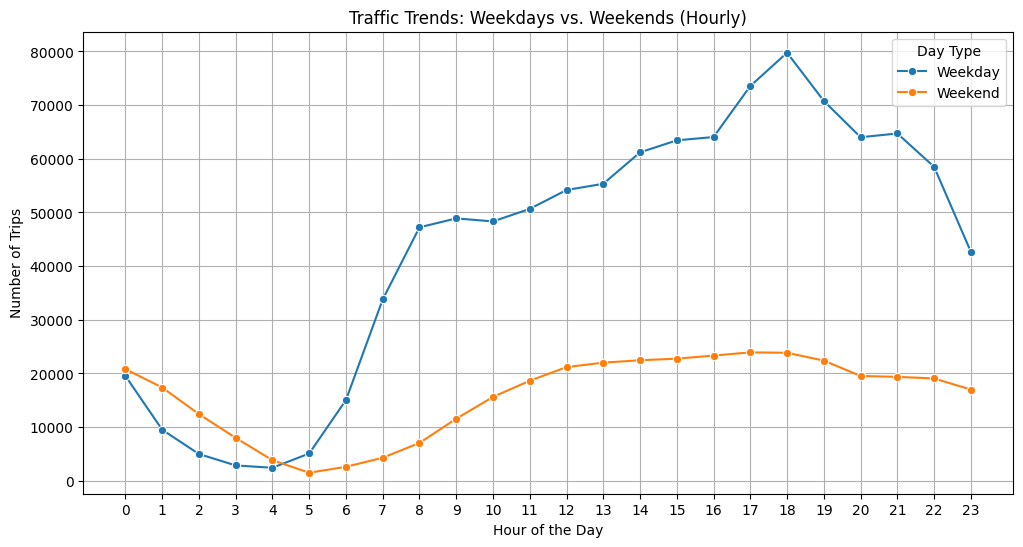

In [154]:
# Compare traffic trends for the week days and weekends

# Create a new column to classify weekdays (0-4) and weekends (5-6)
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by hour and day type
hourly_trends = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Pivot table for better comparison
hourly_trends_pivot = hourly_trends.pivot(index='pickup_hour', columns='day_type', values='trip_count')

# Display the table
print(hourly_trends_pivot)

# Plot hourly traffic trends for weekdays vs. weekends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends (Hourly)")
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.legend(title="Day Type")
plt.grid(True)

# Show the plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

                             zone    borough  total_pickups
210         Upper East Side South  Manhattan          70047
142                Midtown Center  Manhattan          68002
116                   JFK Airport     Queens          64163
209         Upper East Side North  Manhattan          63887
143                  Midtown East  Manhattan          52875
122             LaGuardia Airport     Queens          51798
125           Lincoln Square East  Manhattan          49092
165  Penn Station/Madison Sq West  Manhattan          48790
203     Times Sq/Theatre District  Manhattan          44627
151                   Murray Hill  Manhattan          43352


                          zone    borough  total_dropoffs
229      Upper East Side North  Manhattan           67672
230      Upper East Side South  Manhattan           62687
155             Midtown Center  Manhattan           55623
164                Murray Hill  Manhattan           43370
232      Upper West Side South  Manhattan       

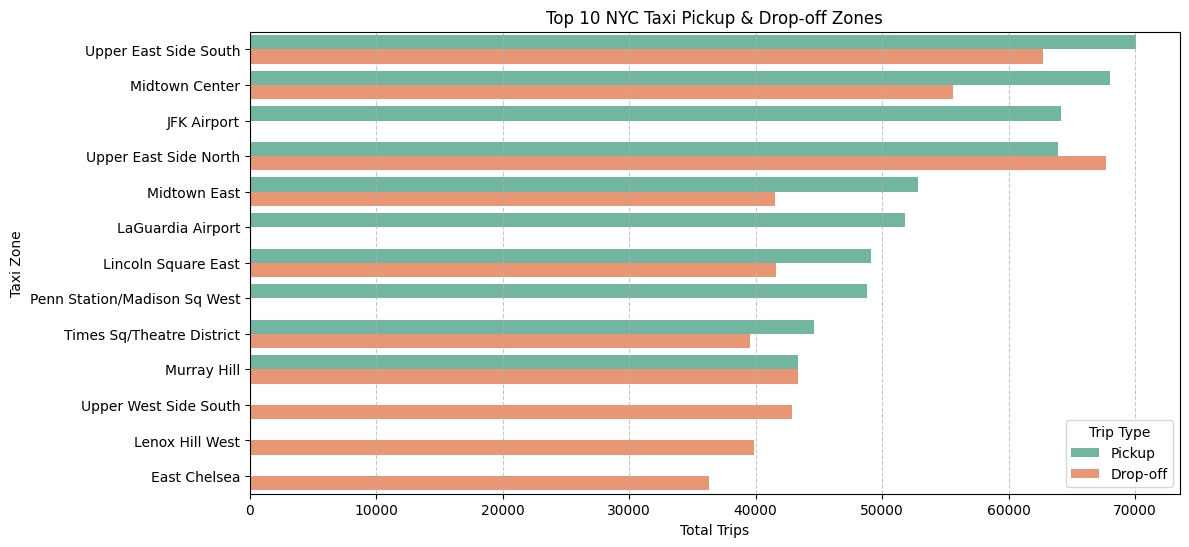

In [157]:
# Find top 10 pickup and dropoff zones

# Pick Ups
top_pickup_zones = df.groupby('PULocationID').size().reset_index(name='total_pickups')

# Merge with taxi zones for zone names
top_pickup_zones = top_pickup_zones.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Select relevant columns and sort by total pickups
top_pickup_zones = top_pickup_zones[['zone', 'borough', 'total_pickups']].sort_values(by='total_pickups', ascending=False)

# Display top 10 pickup zones
print(top_pickup_zones.head(10))


# Drop
top_dropoff_zones = df.groupby('DOLocationID').size().reset_index(name='total_dropoffs')

# Merge with taxi zones for zone names
top_dropoff_zones = top_dropoff_zones.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Select relevant columns and sort by total dropoffs
top_dropoff_zones = top_dropoff_zones[['zone', 'borough', 'total_dropoffs']].sort_values(by='total_dropoffs', ascending=False)

# Display top 10 dropoff zones
print('\n')
print(top_dropoff_zones.head(10))

top_10_pickups = top_pickup_zones.head(10).copy()
top_10_dropoffs = top_dropoff_zones.head(10).copy()

# Rename columns to a common name for uniformity
top_10_pickups = top_10_pickups.rename(columns={'total_pickups': 'total_trips'})
top_10_dropoffs = top_10_dropoffs.rename(columns={'total_dropoffs': 'total_trips'})

# Add a new column to distinguish pickups and drop-offs
top_10_pickups['Type'] = 'Pickup'
top_10_dropoffs['Type'] = 'Drop-off'

# Combine both DataFrames
top_10_zones = pd.concat([top_10_pickups, top_10_dropoffs])

# Set figure size
plt.figure(figsize=(12, 6))

# Plot pickups and drop-offs in the same chart
sns.barplot(
    data=top_10_zones,
    x='total_trips',
    y='zone',
    hue='Type',
    palette=sns.color_palette("Set2", 2)
)

# Formatting
plt.xlabel("Total Trips")
plt.ylabel("Taxi Zone")
plt.title("Top 10 NYC Taxi Pickup & Drop-off Zones")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title="Trip Type")

# Show the plot
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [158]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups per zone
pickup_counts = df.groupby('PULocationID').size().reset_index(name='total_pickups')

# Count drop-offs per zone
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='total_dropoffs')

# Merge the counts
pickup_dropoff_ratios = pickup_counts.merge(dropoff_counts, left_on="PULocationID", right_on="DOLocationID", how="outer")

# Fill missing values with 0 (some locations may not have both pickups and drop-offs)
pickup_dropoff_ratios.fillna(0, inplace=True)

# Rename columns for clarity
pickup_dropoff_ratios.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Calculate the pickup/drop-off ratio
pickup_dropoff_ratios['pickup_dropoff_ratio'] = (
    pickup_dropoff_ratios['total_pickups'] / (pickup_dropoff_ratios['total_dropoffs'] + 1)  # Avoid division by zero
)

# Merge with taxi zones for meaningful location names
pickup_dropoff_ratios = pickup_dropoff_ratios.merge(zones, on="LocationID", how="left")

# Sort to find top 10 (high pickup-to-dropoff) and bottom 10 (high dropoff-to-pickup)
top_10_ratios = pickup_dropoff_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
filtered_ratios = pickup_dropoff_ratios.dropna(subset=['zone', 'total_pickups'])
bottom_10_ratios = filtered_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print("Top 10 Pickup/Drop-off Ratio Zones:")
print(
    top_10_ratios[['zone', 'total_pickups', 'total_dropoffs', 'pickup_dropoff_ratio']]
    .rename(columns={'total_pickups': 'Pickup', 'pickup_dropoff_ratio': 'Ratio', 'total_pickups': 'PickUps', 'pickup_dropoff_ratio': 'Ratio', 'total_dropoffs': 'DropOff'})
)

print("\nBottom 10 Pickup/Drop-off Ratio Zones:")
print(
    bottom_10_ratios[['zone', 'total_pickups', 'total_dropoffs', 'pickup_dropoff_ratio']]
    .rename(columns={'total_pickups': 'Pickup', 'pickup_dropoff_ratio': 'Ratio', 'total_pickups': 'PickUps', 'pickup_dropoff_ratio': 'Ratio', 'total_dropoffs': 'DropOff'})
)

print (len(bottom_10_ratios))

Top 10 Pickup/Drop-off Ratio Zones:
                                 zone  PickUps  DropOff      Ratio
70                      East Elmhurst   6414.0    473.0  13.531646
127                       JFK Airport  64163.0  13857.0   4.630033
133                 LaGuardia Airport  51798.0  18134.0   2.856245
194                     Rikers Island      2.0      0.0   2.000000
1                         Jamaica Bay      2.0      0.0   2.000000
181      Penn Station/Madison Sq West  48790.0  29580.0   1.649370
202  Saint Michaels Cemetery/Woodside     12.0      7.0   1.500000
42                       Central Park  23975.0  17277.0   1.387603
109           Greenwich Village South  19886.0  14396.0   1.381260
244                      West Village  33988.0  25565.0   1.329422

Bottom 10 Pickup/Drop-off Ratio Zones:
                         zone  PickUps  DropOff     Ratio
200              Saint Albans      1.0    149.0  0.006667
50                 Co-Op City      1.0     79.0  0.012500
252          

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [160]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

##### PICK UP
# Filter only night-time trips (11 PM to 5 AM)
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Group by PULocationID and count trips
night_pickup_counts = night_trips.groupby('PULocationID').size().reset_index(name='total_pickups')

# Merge with taxi zones for meaningful names
night_pickup_counts = night_pickup_counts.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Filter out null zone values and sort by pickup count
night_pickup_counts = night_pickup_counts.dropna(subset=['zone']).sort_values(by='total_pickups', ascending=False)

# Display the top 10 nighttime pickup zones
print('\n Displaying the top 10 nighttime pickup zones')
print(night_pickup_counts[['zone', 'borough', 'total_pickups']].head(10))

##### DROP OFFS

# Group by DOLocationID and count trips
night_dropoff_counts = night_trips.groupby('DOLocationID').size().reset_index(name='total_dropoffs')

# Merge with taxi zones for meaningful names
night_dropoff_counts = night_dropoff_counts.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left")

# Filter out null zone values and sort by dropoff count
night_dropoff_counts = night_dropoff_counts.dropna(subset=['zone']).sort_values(by='total_dropoffs', ascending=False)

# Display the top 10 nighttime drop-off zones
print('\n Displaying the top 10 nighttime drop-off zones')
print(night_dropoff_counts[['zone', 'borough', 'total_dropoffs']].head(10))


 Displaying the top 10 nighttime pickup zones
                             zone    borough  total_pickups
58                   East Village  Manhattan          12904
188                  West Village  Manhattan          10528
92                    JFK Airport     Queens           9551
32                   Clinton East  Manhattan           8105
106               Lower East Side  Manhattan           8028
81        Greenwich Village South  Manhattan           7306
172     Times Sq/Theatre District  Manhattan           5923
137  Penn Station/Madison Sq West  Manhattan           5386
120                 Midtown South  Manhattan           4816
47                   East Chelsea  Manhattan           4707

 Displaying the top 10 nighttime drop-off zones
                      zone    borough  total_dropoffs
78            East Village  Manhattan            6799
46            Clinton East  Manhattan            5141
164            Murray Hill  Manhattan            5075
102               Gramercy  

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 12.00%
Daytime Revenue Share: 88.00%


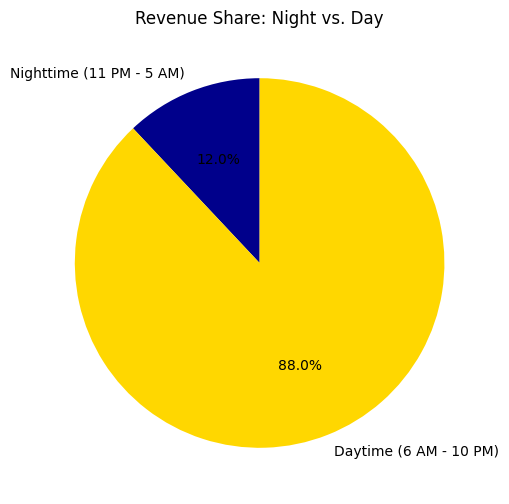

In [161]:
# Filter for night hours (11 PM to 5 AM)

# Define nighttime and daytime trips
night_trips = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_trips = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]

# Calculate total revenue for night and day
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()

# Compute revenue share as percentages
total_revenue = night_revenue + day_revenue
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

# Define labels and values
labels = ['Nighttime (11 PM - 5 AM)', 'Daytime (6 AM - 10 PM)']
values = [night_revenue, day_revenue]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['darkblue', 'gold'], startangle=90)
plt.title("Revenue Share: Night vs. Day")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [167]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid trips
valid_trips = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_trips = valid_trips.copy()
valid_trips['Vendor_ID'] = valid_trips.index

# Calculate fare per mile per passenger
valid_trips.loc[:, 'fare_per_mile_per_passenger'] = valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count'])

# Compute average fare per mile per passenger for each passenger count
fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Rename columns for clarity
fare_analysis.rename(columns={'passenger_count': 'Passenger_Count', 'fare_per_mile_per_passenger': 'Avg_Fare_per_Mile'}, inplace=True)
#fare_analysis['Avg_Fare_per_Mile'] = fare_analysis['Avg_Fare_per_Mile'].round(2)

# Display results
print(fare_analysis)

   Passenger_Count  Avg_Fare_per_Mile
0              1.0           9.275407
1              2.0           4.991142
2              3.0           3.328711
3              4.0           3.911003
4              5.0           1.589161
5              6.0           1.284684


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [166]:
valid_trips.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'speed_mph',
 'day_type']

    Hour_of_Day  Avg_fare_per_mile
0             0           7.699211
1             1           8.717231
2             2           8.167936
3             3           7.419247
4             4          11.310028
5             5          11.822035
6             6           9.869442
7             7           9.094931
8             8           9.024298
9             9           9.093976
10           10           9.272293
11           11           9.740092
12           12           9.968068
13           13          10.107457
14           14          10.159735
15           15          10.221834
16           16          12.260482
17           17          10.461335
18           18           9.700552
19           19           9.347324
20           20           7.983052
21           21           7.988549
22           22           8.309243
23           23           8.531586
  Day_of_Week  Avg_fare_per_mile
0      Monday           9.141633
1     Tuesday           9.448737
2   Wednesday           9.

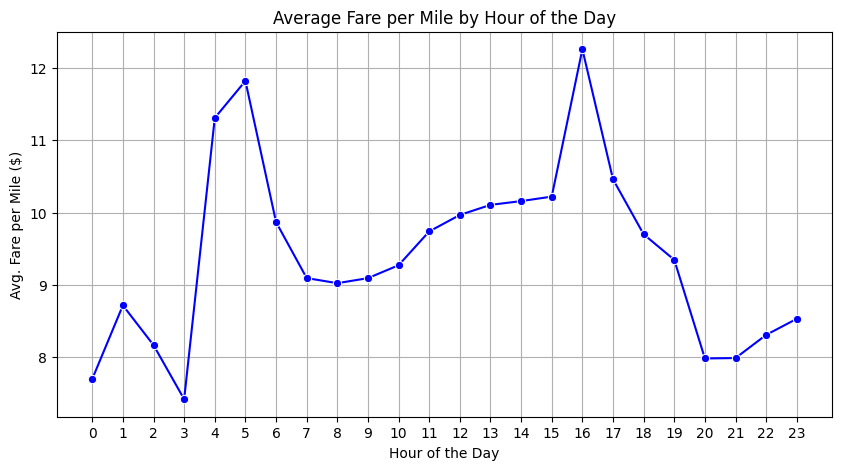

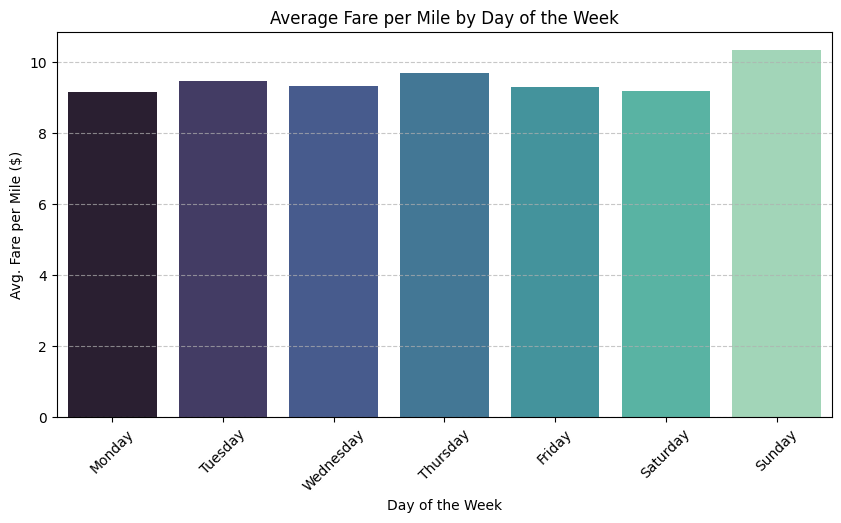

In [168]:
# Compare the average fare per mile for different days and for different times of the day

# Filter out invalid trips (trip_distance > 0)
valid_trips = df[df['trip_distance'] > 0]
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Group by pickup hour and calculate the average fare per mile
fare_per_mile_hour = valid_trips.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
fare_per_mile_hour.rename(columns={'pickup_hour': 'Hour_of_Day', 'fare_per_mile': 'Avg_fare_per_mile'}, inplace=True)

# Display results
print(fare_per_mile_hour)

# Group by day of the week and compute the average fare per mile
fare_per_mile_day = valid_trips.groupby('pickup_day', as_index=False)['fare_per_mile'].mean()

# Rename columns for clarity
fare_per_mile_day.rename(columns={'pickup_day': 'Day_of_Week', 'fare_per_mile': 'Avg_fare_per_mile'}, inplace=True)

# Map numeric day values to weekday names
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
fare_per_mile_day['Day_of_Week'] = fare_per_mile_day['Day_of_Week'].map(days_mapping)

# Display results
print(fare_per_mile_day)


# Plot fare per mile by hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_per_mile_hour, x='Hour_of_Day', y='Avg_fare_per_mile', marker='o', color='blue')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(24))  # Show all hours
plt.grid(True)

# Show plot
plt.show()

# Plot fare per mile by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_per_mile_day, x='Day_of_Week', y='Avg_fare_per_mile', palette="mako")

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Avg. Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  Hour_of_Day  Avg_fare_per_mile
0         1            0           6.722150
1         1            1           6.764580
2         1            2           6.840530
3         1            3           6.384856
4         1            4           6.989102


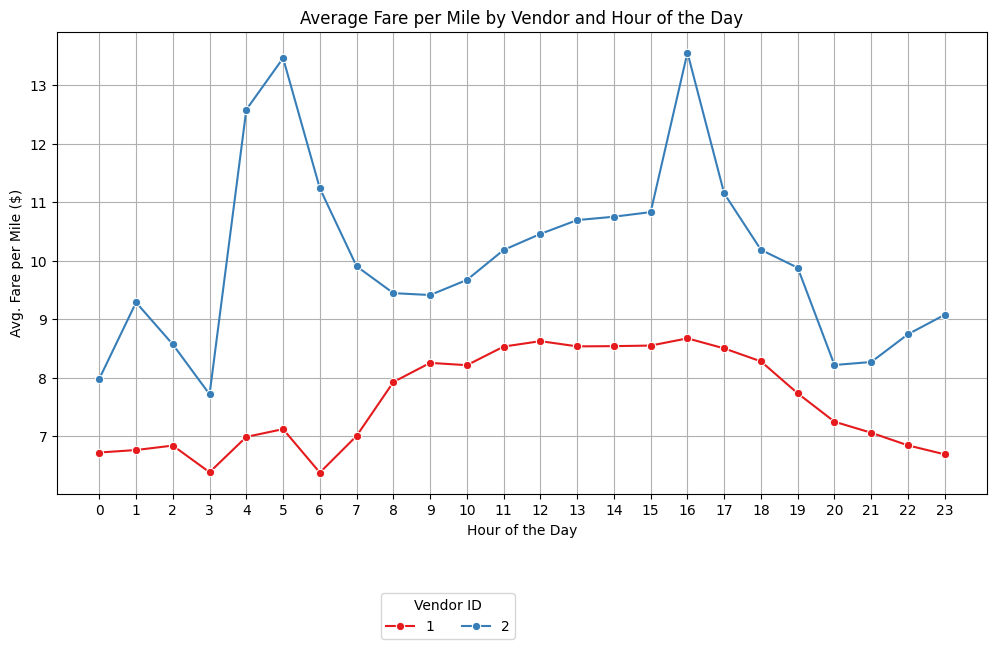

In [207]:
# Compare fare per mile for different vendors

valid_trips = valid_trips.reset_index()

# Group by VendorID and pickup hour to calculate the average fare per mile
fare_per_mile_vendor_hour = valid_trips.groupby(['VendorID', 'pickup_hour'], as_index=False)['fare_per_mile'].mean()

# Rename columns for clarity
fare_per_mile_vendor_hour.rename(columns={'pickup_hour': 'Hour_of_Day', 'fare_per_mile': 'Avg_fare_per_mile'}, inplace=True)

# Display results
print(fare_per_mile_vendor_hour.head())

# Set figure size
plt.figure(figsize=(12, 6))

# Line plot to compare vendors' fare per mile across hours
sns.lineplot(data=fare_per_mile_vendor_hour, x='Hour_of_Day', y='Avg_fare_per_mile', hue='VendorID', marker='o', palette='Set1')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor and Hour of the Day")
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(True)

# Move legend to the bottom
plt.legend(title="Vendor ID", loc='best', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show plot
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID       distance_tier  fare_per_mile
0         1     Long (>5 miles)       4.472910
1         1  Medium (2-5 miles)       6.361424
2         1    Short (≤2 miles)       9.522530
3         2     Long (>5 miles)       4.505116
4         2  Medium (2-5 miles)       6.547486
5         2    Short (≤2 miles)      13.581823


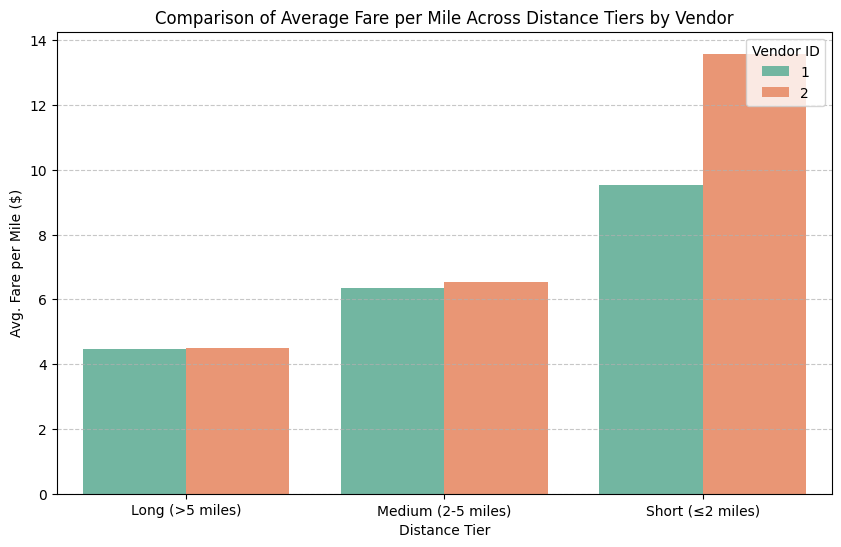

In [210]:
# Defining distance tiers

# Define distance tiers
def classify_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

# Apply classification
valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(classify_distance)


# Group by VendorID and Distance Tier, then calculate the average fare per mile
fare_per_mile_tiers = valid_trips.groupby(['VendorID', 'distance_tier'], as_index=False)['fare_per_mile'].mean()
#fare_per_mile_tiers['VendorID'] = fare_per_mile_tiers.index
fare_per_mile_tiers =  fare_per_mile_tiers

# Display results
print(fare_per_mile_tiers)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar plot comparing vendors across distance tiers
sns.barplot(data=fare_per_mile_tiers, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg. Fare per Mile ($)")
plt.title("Comparison of Average Fare per Mile Across Distance Tiers by Vendor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Vendor ID", loc='upper right')

# Show plot
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

        distance_tier  Avg_Tip_Percentage
0     Long (>5 miles)           23.564528
1  Medium (2-5 miles)           23.158698
2    Short (≤2 miles)           28.842981

    Passenger_Count  Avg_Tip_Percentage
0              1.0           26.510411
1              2.0           25.817739
2              3.0           25.809235
3              4.0           25.890215
4              5.0           26.048419
5              6.0           26.161426

     Hour_of_Day  Avg_Tip_Percentage
0             0           25.852829
1             1           26.117719
2             2           26.574955
3             3           27.572793
4             4           27.102913
5             5           26.165000
6             6           25.274886
7             7           24.993986
8             8           25.006788
9             9           25.292523
10           10           25.541912
11           11           25.527422
12           12           25.394349
13           13           25.430363
14           14

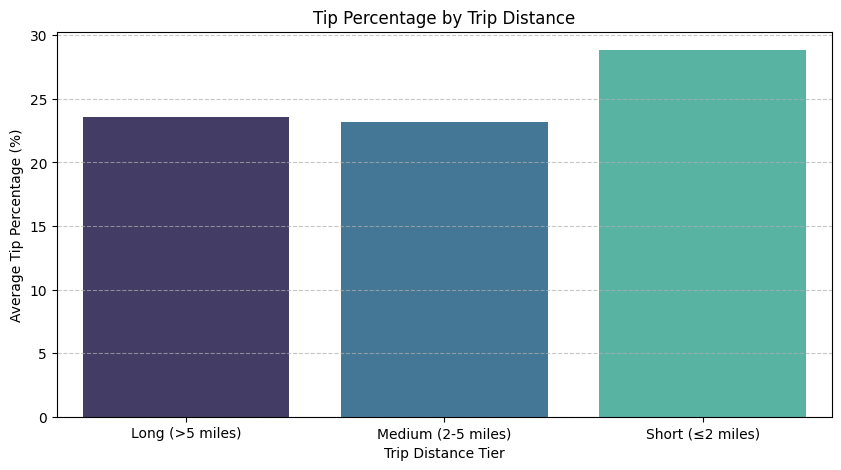

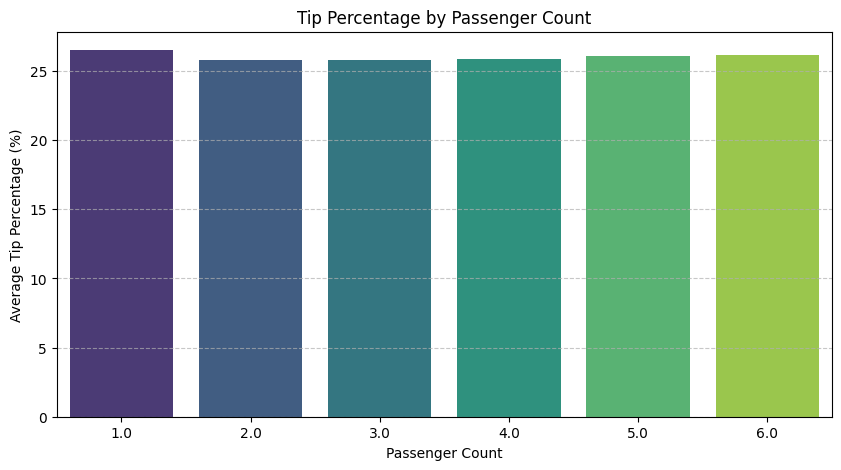

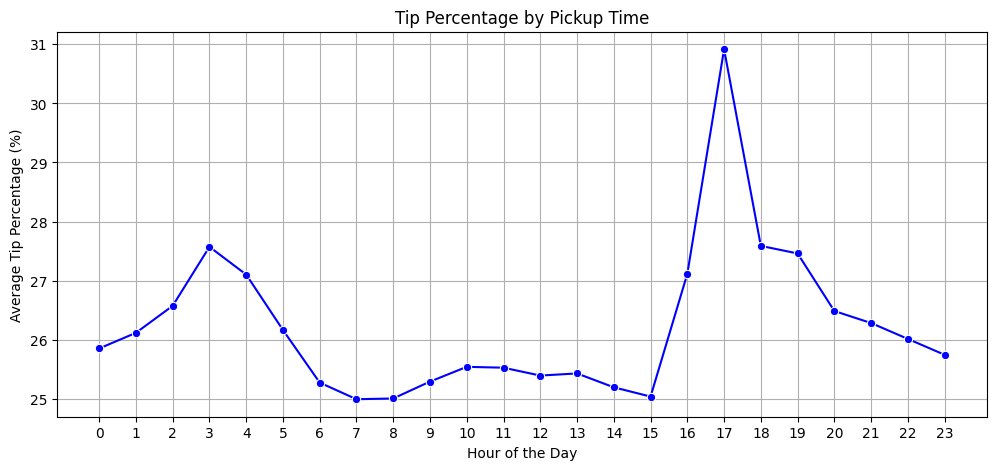

In [217]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
valid_trips = valid_trips[valid_trips['passenger_count']>0]
valid_trips['tip_percentage'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

def classify_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

# Apply classification
valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(classify_distance)

# Group by distance tier and calculate average tip percentage
tip_by_distance = valid_trips.groupby('distance_tier', as_index=False)['tip_percentage'].mean()

# Rename for clarity
tip_by_distance.rename(columns={'tip_percentage': 'Avg_Tip_Percentage'}, inplace=True)

# Display results
print(tip_by_distance)

# Group by passenger count and calculate average tip percentage
tip_by_passenger = valid_trips.groupby('passenger_count', as_index=False)['tip_percentage'].mean()

# Rename for clarity
tip_by_passenger.rename(columns={'passenger_count': 'Passenger_Count', 'tip_percentage': 'Avg_Tip_Percentage'}, inplace=True)

# Display results
print('\n', tip_by_passenger)


# Group by pickup hour and calculate average tip percentage
tip_by_hour = valid_trips.groupby('pickup_hour', as_index=False)['tip_percentage'].mean()

# Rename for clarity
tip_by_hour.rename(columns={'pickup_hour': 'Hour_of_Day', 'tip_percentage': 'Avg_Tip_Percentage'}, inplace=True)

# Display results
print('\n', tip_by_hour)

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_distance, x='distance_tier', y='Avg_Tip_Percentage', palette="mako")

# Formatting
plt.xlabel("Trip Distance Tier")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Trip Distance")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_passenger, x='Passenger_Count', y='Avg_Tip_Percentage', palette="viridis")

# Formatting
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Line plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=tip_by_hour, x='Hour_of_Day', y='Avg_Tip_Percentage', marker='o', color='blue')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Pickup Time")
plt.xticks(range(24))
plt.grid(True)

# Show plot
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Avg. Trip Distance for Low Tips (<10%): 4.91 miles
Avg. Trip Distance for High Tips (>25%): 2.31 miles

    passenger_count  low_tip_count  high_tip_count
0              1.0          57576          623185
1              2.0          11249          117266
2              3.0           2743           28111
3              4.0           1391           14247
4              5.0            985           10884
5              6.0            675            7173

    Hour_of_Day  low_tip_count  high_tip_count
0            0           2601           22550
1            1           1758           15419
2            2           1183           10211
3            3            838            6357
4            4            436            3438

    payment_type  low_tip_count  high_tip_count
0             1          74613          800837
1             2              1              16
2             3              3               2
3             4              2              11


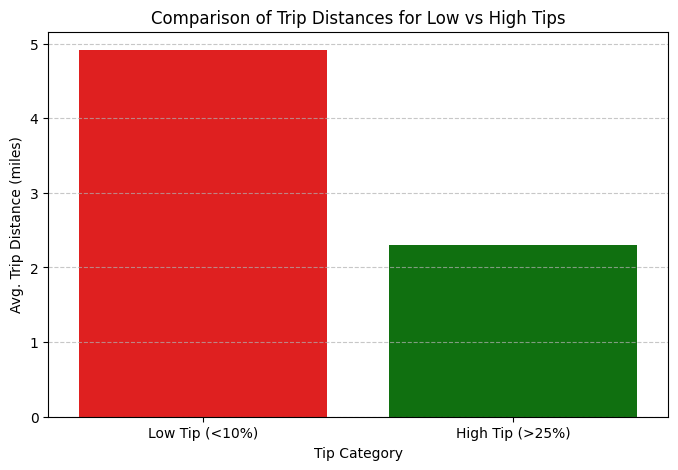

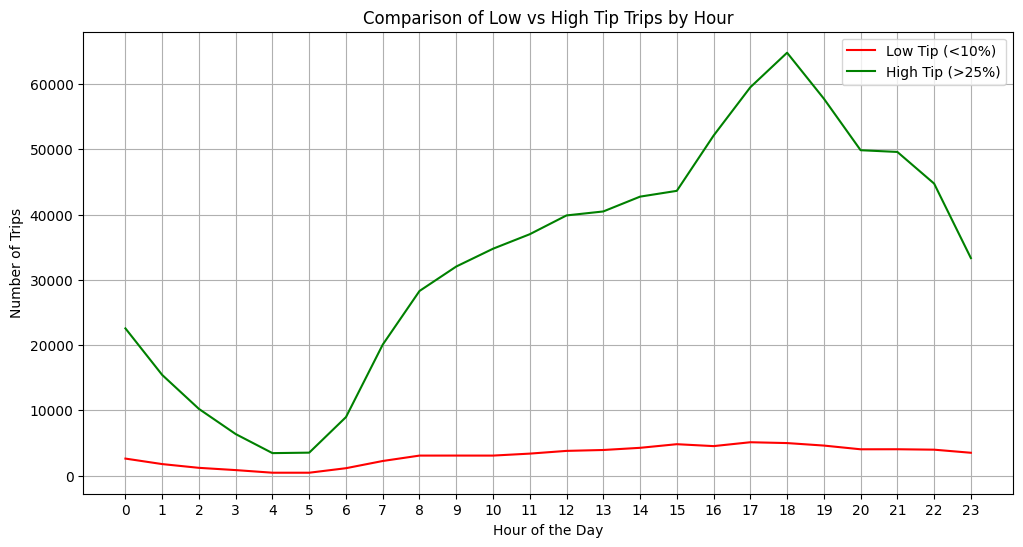

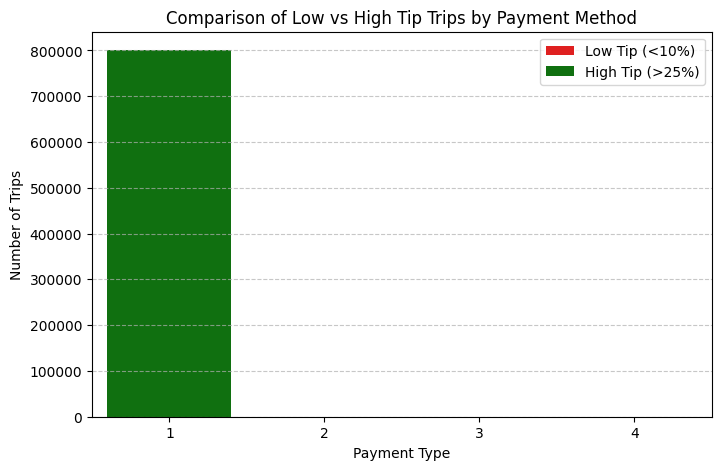

In [218]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Segment trips based on tip percentage
low_tip_trips = valid_trips[valid_trips['tip_percentage'] < 10]
high_tip_trips = valid_trips[valid_trips['tip_percentage'] > 25]

# Compute average trip distance for both groups
avg_distance_low_tips = low_tip_trips['trip_distance'].mean()
avg_distance_high_tips = high_tip_trips['trip_distance'].mean()

print(f"Avg. Trip Distance for Low Tips (<10%): {avg_distance_low_tips:.2f} miles")
print(f"Avg. Trip Distance for High Tips (>25%): {avg_distance_high_tips:.2f} miles")

# Group by passenger count and calculate trip distribution for both groups
passenger_tips = valid_trips.groupby(['passenger_count']).agg(
    low_tip_count=('tip_percentage', lambda x: (x < 10).sum()),
    high_tip_count=('tip_percentage', lambda x: (x > 25).sum())
).reset_index()

# Display results
print('\n', passenger_tips)

# Group by pickup hour and compute the percentage of low and high tip trips
tip_by_hour = valid_trips.groupby('pickup_hour').agg(
    low_tip_count=('tip_percentage', lambda x: (x < 10).sum()),
    high_tip_count=('tip_percentage', lambda x: (x > 25).sum())
).reset_index()

# Rename columns for clarity
tip_by_hour.rename(columns={'pickup_hour': 'Hour_of_Day'}, inplace=True)

# Display results
print('\n', tip_by_hour.head())

# Group by payment type and compute trip distribution
tip_by_payment = valid_trips.groupby('payment_type').agg(
    low_tip_count=('tip_percentage', lambda x: (x < 10).sum()),
    high_tip_count=('tip_percentage', lambda x: (x > 25).sum())
).reset_index()

# Display results
print('\n', tip_by_payment)

# Bar plot for trip distance comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=['Low Tip (<10%)', 'High Tip (>25%)'], y=[avg_distance_low_tips, avg_distance_high_tips], palette=['red', 'green'])

# Formatting
plt.xlabel("Tip Category")
plt.ylabel("Avg. Trip Distance (miles)")
plt.title("Comparison of Trip Distances for Low vs High Tips")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Line plot for hourly tip trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=tip_by_hour, x='Hour_of_Day', y='low_tip_count', label="Low Tip (<10%)", color='red')
sns.lineplot(data=tip_by_hour, x='Hour_of_Day', y='high_tip_count', label="High Tip (>25%)", color='green')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Comparison of Low vs High Tip Trips by Hour")
plt.xticks(range(24))
plt.grid(True)

# Show plot
plt.show()

# Bar plot for payment method comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_payment, x='payment_type', y='low_tip_count', color='red', label='Low Tip (<10%)')
sns.barplot(data=tip_by_payment, x='payment_type', y='high_tip_count', color='green', label='High Tip (>25%)')

# Formatting
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Comparison of Low vs High Tip Trips by Payment Method")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


     Hour_of_Day  Avg_Passenger_Count
0             0                 1.41
1             1                 1.42
2             2                 1.43
3             3                 1.45
4             4                 1.41
5             5                 1.29
6             6                 1.24
7             7                 1.26
8             8                 1.27
9             9                 1.28
10           10                 1.32
11           11                 1.34
12           12                 1.35
13           13                 1.35
14           14                 1.36
15           15                 1.38
16           16                 1.37
17           17                 1.35
18           18                 1.34
19           19                 1.36
20           20                 1.37
21           21                 1.40
22           22                 1.41
23           23                 1.40

   pickup_day_name  Avg_Passenger_Count
0          Friday               

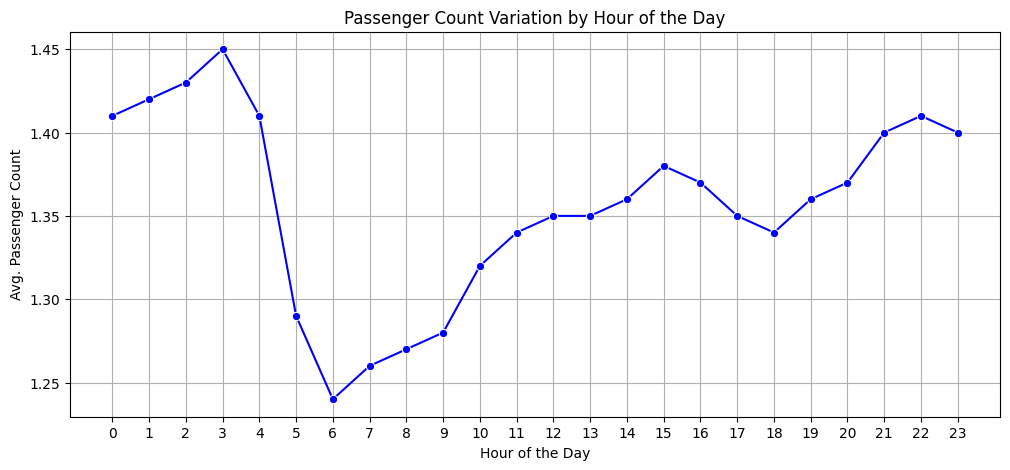

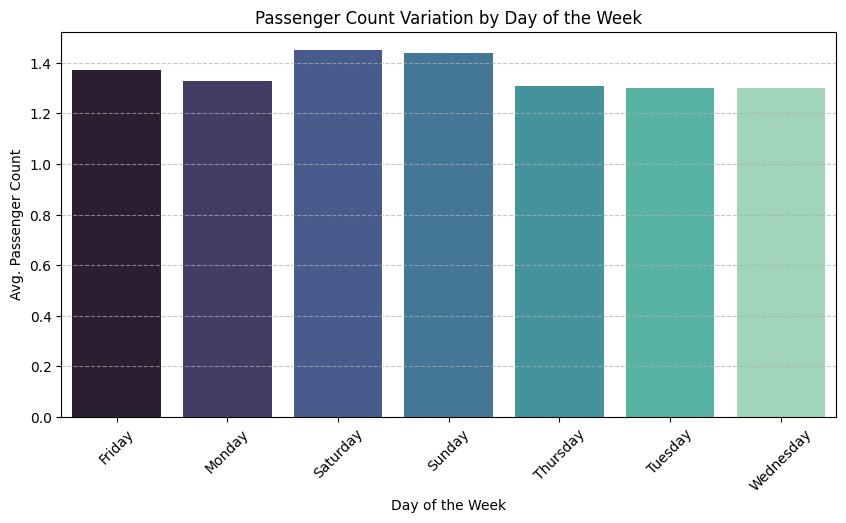

In [219]:
# See how passenger count varies across hours and days

# Map numeric day values to weekday names
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name'] = df['pickup_day'].map(days_mapping)

# Group by hour and calculate the average number of passengers per trip
passenger_by_hour = df.groupby('pickup_hour', as_index=False)['passenger_count'].mean()
passenger_by_hour['passenger_count'] = passenger_by_hour['passenger_count'].round(2)

# Rename for clarity
passenger_by_hour.rename(columns={'pickup_hour': 'Hour_of_Day', 'passenger_count': 'Avg_Passenger_Count'}, inplace=True)

# Display results
print('\n', passenger_by_hour)

# Group by day of the week and calculate the average number of passengers per trip
passenger_by_day = df.groupby('pickup_day_name', as_index=False)['passenger_count'].mean()
passenger_by_day['passenger_count'] = passenger_by_day['passenger_count'].round(2)

# Rename for clarity
passenger_by_day.rename(columns={'passenger_count': 'Avg_Passenger_Count'}, inplace=True)

# Display results
print('\n', passenger_by_day)

# Line plot for passenger count by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=passenger_by_hour, x='Hour_of_Day', y='Avg_Passenger_Count', marker='o', color='blue')

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Passenger Count")
plt.title("Passenger Count Variation by Hour of the Day")
plt.xticks(range(24))
plt.grid(True)

# Show plot
plt.show()

# Bar plot for passenger count by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(data=passenger_by_day, x='pickup_day_name', y='Avg_Passenger_Count', palette="mako")

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Avg. Passenger Count")
plt.title("Passenger Count Variation by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

                      zone        borough  Avg_Passenger_Count
0           Newark Airport            EWR             1.559055
1              Jamaica Bay         Queens             1.000000
2            Alphabet City      Manhattan             1.423645
3  Arrochar/Fort Wadsworth  Staten Island             2.000000
4                  Astoria         Queens             1.359431
5             Astoria Park         Queens             1.500000
6               Auburndale         Queens             1.333333
7             Baisley Park         Queens             1.512195
8               Bath Beach       Brooklyn             1.000000
9             Battery Park      Manhattan             1.635294


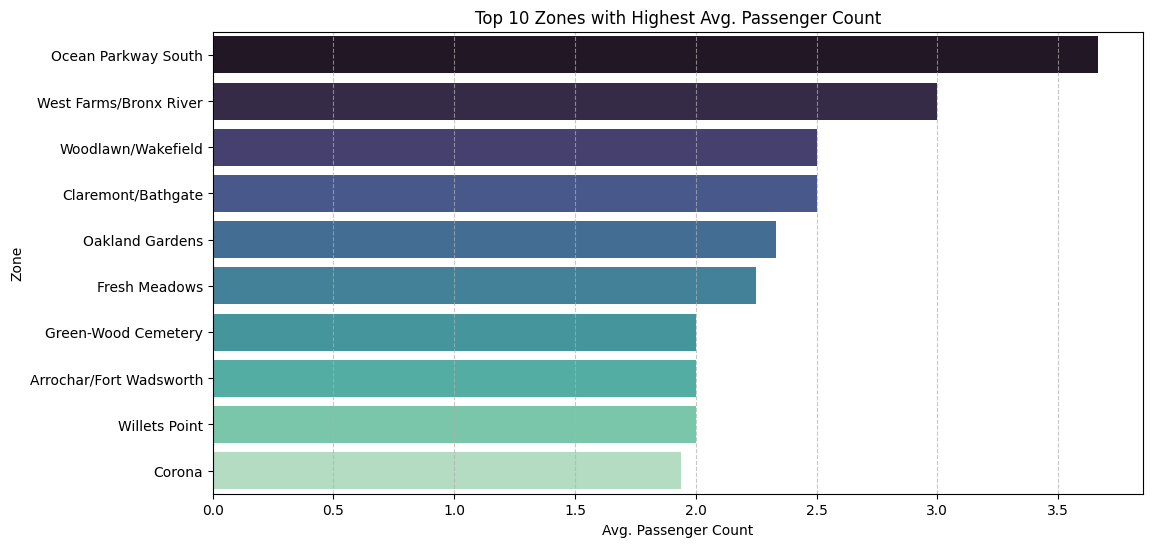

In [220]:
# How does passenger count vary across zones

# Group by pickup zone (PULocationID) and compute average passenger count
passenger_by_zone = df.groupby('PULocationID', as_index=False)['passenger_count'].mean()

# Rename for clarity
passenger_by_zone.rename(columns={'passenger_count': 'Avg_Passenger_Count'}, inplace=True)

# Merge with taxi zones dataset to get zone names
passenger_by_zone = passenger_by_zone.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Keep only relevant columns
passenger_by_zone = passenger_by_zone[['zone', 'borough', 'Avg_Passenger_Count', 'PULocationID']]

# Drop any rows where zone is missing
passenger_by_zone = passenger_by_zone.dropna(subset=['zone'])

# Display results
print(passenger_by_zone[['zone', 'borough', 'Avg_Passenger_Count']].head(10))

# Select top 10 zones with highest passenger counts
top_passenger_zones = passenger_by_zone.sort_values(by='Avg_Passenger_Count', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_passenger_zones, x='Avg_Passenger_Count', y='zone', palette="mako")

# Formatting
plt.xlabel("Avg. Passenger Count")
plt.ylabel("Zone")
plt.title("Top 10 Zones with Highest Avg. Passenger Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

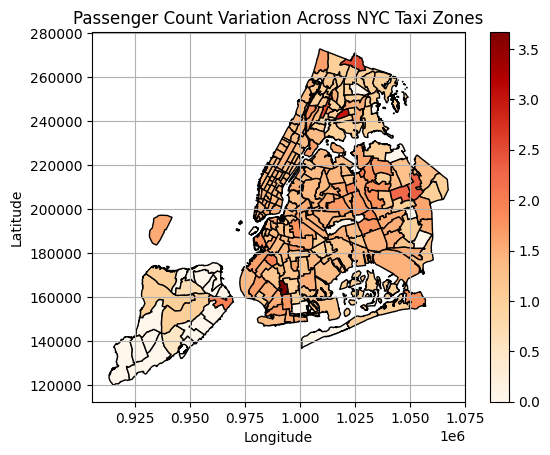

In [221]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Merge passenger count data with taxi zones GeoDataFrame
taxi_zones_passengers = zones.merge(passenger_by_zone, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (zones with no passenger data) with 0
taxi_zones_passengers['Avg_Passenger_Count'].fillna(0, inplace=True)

# Plot passenger count across NYC taxi zones
plt.figure(figsize=(12, 8))
taxi_zones_passengers.plot(column='Avg_Passenger_Count', cmap='OrRd', edgecolor='black', legend=True)

# Formatting
plt.title("Passenger Count Variation Across NYC Taxi Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

         Surcharge_Type    Count  Percentage
0                 extra   900279   63.353485
1               mta_tax  1410099   99.230001
2  congestion_surcharge  1346675   94.766794
3           Airport_fee   116836    8.221860

                              zone      extra   mta_tax  congestion_surcharge  \
119             LaGuardia Airport  327054.79  25655.55               89400.0   
139                Midtown Center  114560.50  33748.10              168860.0   
208         Upper East Side South  102468.28  34953.40              174815.0   
109                   JFK Airport   98055.60  31443.90               91427.5   
207         Upper East Side North   90151.90  31888.10              159075.0   
140                  Midtown East   86194.40  26274.80              131475.0   
201     Times Sq/Theatre District   75014.50  21933.80              109877.5   
122           Lincoln Square East   72925.70  24469.70              122315.0   
141                 Midtown North   68418.50  20797.5

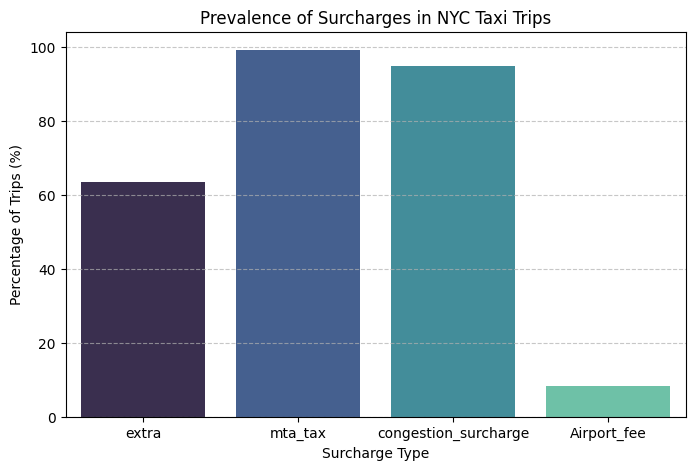

<Axes: xlabel='pickup_hour', ylabel='extra'>

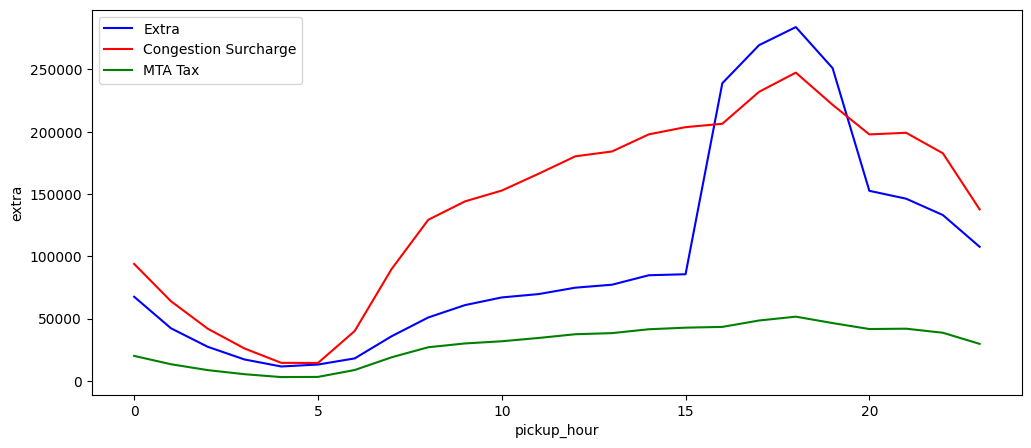

In [223]:
# How often is each surcharge applied?

# Count how often each surcharge type is applied
surcharge_counts = df[['extra', 'mta_tax', 'congestion_surcharge', 'Airport_fee']].apply(lambda x: (x > 0).sum())

# Convert to a DataFrame
surcharge_counts = surcharge_counts.reset_index()
surcharge_counts.columns = ['Surcharge_Type', 'Count']

# Calculate percentage of trips with each surcharge
surcharge_counts['Percentage'] = (surcharge_counts['Count'] / len(df)) * 100

# Display results
print(surcharge_counts)

# Merge with taxi zones dataset for meaningful zone names
df_zones = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Count surcharge occurrences per zone
surcharge_by_zone = df_zones.groupby('zone')[['extra', 'mta_tax', 'congestion_surcharge', 'Airport_fee']].sum().reset_index()

# Sort zones where surcharges are applied most frequently
surcharge_by_zone = surcharge_by_zone.sort_values(by='extra', ascending=False)  # Sort by 'extra' charges

# Display top 10 zones with most extra charges
print('\n', surcharge_by_zone.head(10))

# Count surcharge applications per hour
surcharge_by_hour = df.groupby('pickup_hour')[['extra', 'mta_tax', 'congestion_surcharge', 'Airport_fee']].sum().reset_index()

# Count surcharge applications per day of the week
surcharge_by_day = df.groupby('pickup_day')[['extra', 'mta_tax', 'congestion_surcharge', 'Airport_fee']].sum().reset_index()

# Map days of the week for readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
surcharge_by_day['pickup_day'] = surcharge_by_day['pickup_day'].map(days_mapping)


# Display results
print('\n', surcharge_by_hour.head())
print('\n', surcharge_by_day.head())

# Bar plot for surcharge prevalence
plt.figure(figsize=(8, 5))
sns.barplot(data=surcharge_counts, x='Surcharge_Type', y='Percentage', palette="mako")

# Formatting
plt.xlabel("Surcharge Type")
plt.ylabel("Percentage of Trips (%)")
plt.title("Prevalence of Surcharges in NYC Taxi Trips")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Line plot for surcharge trends by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=surcharge_by_hour, x='pickup_hour', y='extra', label="Extra", color='blue')
sns.lineplot(data=surcharge_by_hour, x='pickup_hour', y='congestion_surcharge', label="Congestion Surcharge", color='red')
sns.lineplot(data=surcharge_by_hour, x='pickup_hour', y='mta_tax', label="MTA Tax", color='green')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
'''

  - Surge Pricing for High-Tip Scenarios
    - Encourage drivers to operate late at night (10 PM - 2 AM) due to higher tip percentages.
    - Promote cashless transactions to improve driver earnings (higher tipping on card payments).

  - Optimized Routing for Efficiency
    - Avoid high-congestion routes during peak hours (Downtown, Times Square).
    - Suggest alternate routes for to minimize travel time.

  - Data shows that peak demand happens during specific time slots
    - e.g., 1:00 PM – 9:00 PM on weekdays.
    - Idle cabs should be moved to high-demand areas, such as
      - Upper East Side South/North and Midtown Centre just before these hours begin.

  - Offer extra incentives for completing a set number of trips in high-demand areas during peak hours.
    - This will encourage drivers to return to these locations and improve their overall satisfaction.

  - To reduce customer waiting time, prioritize assigning cabs that are within 2 minutes of the high-demand zones.

  - In high-demand areas, instruct cab drivers to wait at well-known locations for better accessibility.

  - Set up a centralized point where drivers can be stationed in high-demand zones.
    - This will assure customers of cab availability at specific locations.

'''

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
'''

- Weekday Mornings (6 AM - 10 AM)
    - High demand in residential areas (Brooklyn, Queens, Upper Manhattan) → Business districts (Midtown, Financial District).
    - Action: Deploy more taxis in Brooklyn & Queens for pickups & redirect them towards Midtown and Lower Manhattan.

- Weekday Evenings (5 PM - 9 PM)
    - Major demand shift from business districts to residential areas.
    - Action: Increase availability at Penn Station, Grand Central, Wall Street, and Times Square for home-bound commuters.

- Late-Night (10 PM - 3 AM) – Weekends & Fridays
    - Demand spikes in nightlife hotspots (Meatpacking District, SoHo, Williamsburg, Lower East Side).
    - Action: Position cabs near clubs, bars, and entertainment venues before peak closing hours (1-3 AM).

- Early Morning (3 AM - 6 AM)
    - High demand for airport-bound rides (JFK, LaGuardia, Newark Airport) and late-night workers.
    - Action: Keep taxis available near hotels, transportation hubs (Penn Station), and 24-hour work districts.

'''

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
'''

1. Time-Based Surge Pricing

Peak Hour Pricing (7-9 AM & 5-7 PM on Weekdays)
    - Increase fares by 10-15% during the busiest hours when passengers rely on taxis due to transit congestion.
    - Target business districts & residential areas where demand is high.
Nighttime & Weekend Pricing (10 PM - 2 AM, Fri & Sat)
    - Higher fares (15-20%) for late-night rides due to fewer drivers and higher tips.
    - Focus on nightlife zones (SoHo, Meatpacking, Williamsburg, Lower East Side).
Early Morning Airport Pricing (3-6 AM)
    - Introduce a "Flat-Rate Premium" for JFK & LaGuardia-bound rides due to steady demand from travelers.
Off-Peak Discounts (2-5 AM & Midday 11 AM - 3 PM)
    - Reduce fares by 5-10% to increase ride volume when demand is lowest.


2. Distance-Based Fare Adjustments

Short Trips (<2 miles) → Increase Base Fare Slightly
    - Increase minimum fare by $0.50 - $1 to make short trips more profitable.
    - Ideal for Midtown, Financial District, and local residential trips.
Medium Trips (2-5 miles) → Keep Competitive Pricing
    - No major adjustments to maintain affordability and ride frequency.
Long Trips (>5 miles) → Lower Per-Mile Rate
    - Reduce per-mile charge slightly (-5%) to make long rides more attractive.
    - Target routes to/from airports & outer boroughs (Bronx, Queens, Staten Island).


3. Zone-Based Pricing Optimization

Premium Zones:
    - Higher fares for high-demand locations:
    - Airports, Midtown, Wall Street, Entertainment Districts.
Discount Zones:
    - Lower fares for low-demand residential areas:
    - Outer Queens, Bronx, Staten Island.


Conclusion: Balanced Pricing for Revenue & Competitiveness
    - Surge pricing during peak hours & events ensures higher revenue when demand is high.
    - Lower per-mile rates for long trips & off-peak discounts encourage more rides.
    - Cash payment fees drive higher electronic transactions & tipping rates.
    - Strategic adjustments ensure affordability while boosting profitability.


Suggestions:
  - Shared Model
    - Implement a shared ride option where up to three passengers can merge trips based on similar pickup and drop locations.
    - Offer a 30% discount per passenger for shared trips.
    - Except during the five busiest hours of the day.
    - In this shared model, consider a fixed fare per kilometer for simplicity.
    - This approach will encourage more people to use cab services during non-peak hours, increasing trip counts and boosting overall revenue.

  - Loyalty Points:
    - Introduce a loyalty points system that customers can redeem for future rides.
    - This will encourage them to choose cabs more frequently.

'''